# Lab 1: ENSO
### Alex Monaghan
DATA330 - Professor Davis

***


### 1. Introduction

#### 1.1 Purpose and Scope
The purpose of the paper (Lam et al.) is to discover how the El Nino Southern Oscillation (ENSO) can affect people medically. In the paper, ONI, MEI, and EMDAT data is utilized to calculate the number of People Affected by Disaster (PAD). It was discovered that 75% of those who made up the PAD were from Asia, with many being affected by storms, floods, and droughts (95%).

#### 1.2 Packages
For the notebook to run properly, we need to install the tswge package.

In [197]:
install.packages("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [198]:
library("tswge")

### 2. Methods
There are two temperature index datsets that we are interested in.
I was able to find two websites for each.
For the ONI data, the "oni.ascii.txt" file is a plain text file that should be easy enough to download and read into an R dataframe.

For the MEI data, there is an old and a new dataset. 
The new dataset only goes back to 1979, which does not match our study period; therefore, I'm going to try to import the HTML file associated with the old data.

1. Oceanic Ni&ntilde;o Index (ONI)
    - https://psl.noaa.gov/data/correlation/oni.data
    - https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt 
1. Multi-variate ENSO Index (MEI)
    - https://psl.noaa.gov/enso/mei/data/meiv2.data (1979-2021)
    - https://psl.noaa.gov/enso/mei.old/table.html (1950-2018)

#### 2.1 Oceanic Ni&ntilde;o Index (ONI)

In [199]:
# Define the URL, scrub the file name from the URL and download to /tmp
oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/tmp/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

In [200]:
# Read directly to dataframe preserving the header
oni.df <- read.table(oni.file, header = TRUE)

In [201]:
# Filter the data frame for our month of interest for each year
# in our time period of interest
oni.filt <- subset(oni.df, SEAS == 'DJF')
oni.filt <- subset(oni.filt, YR > 1963 & YR < 2018)

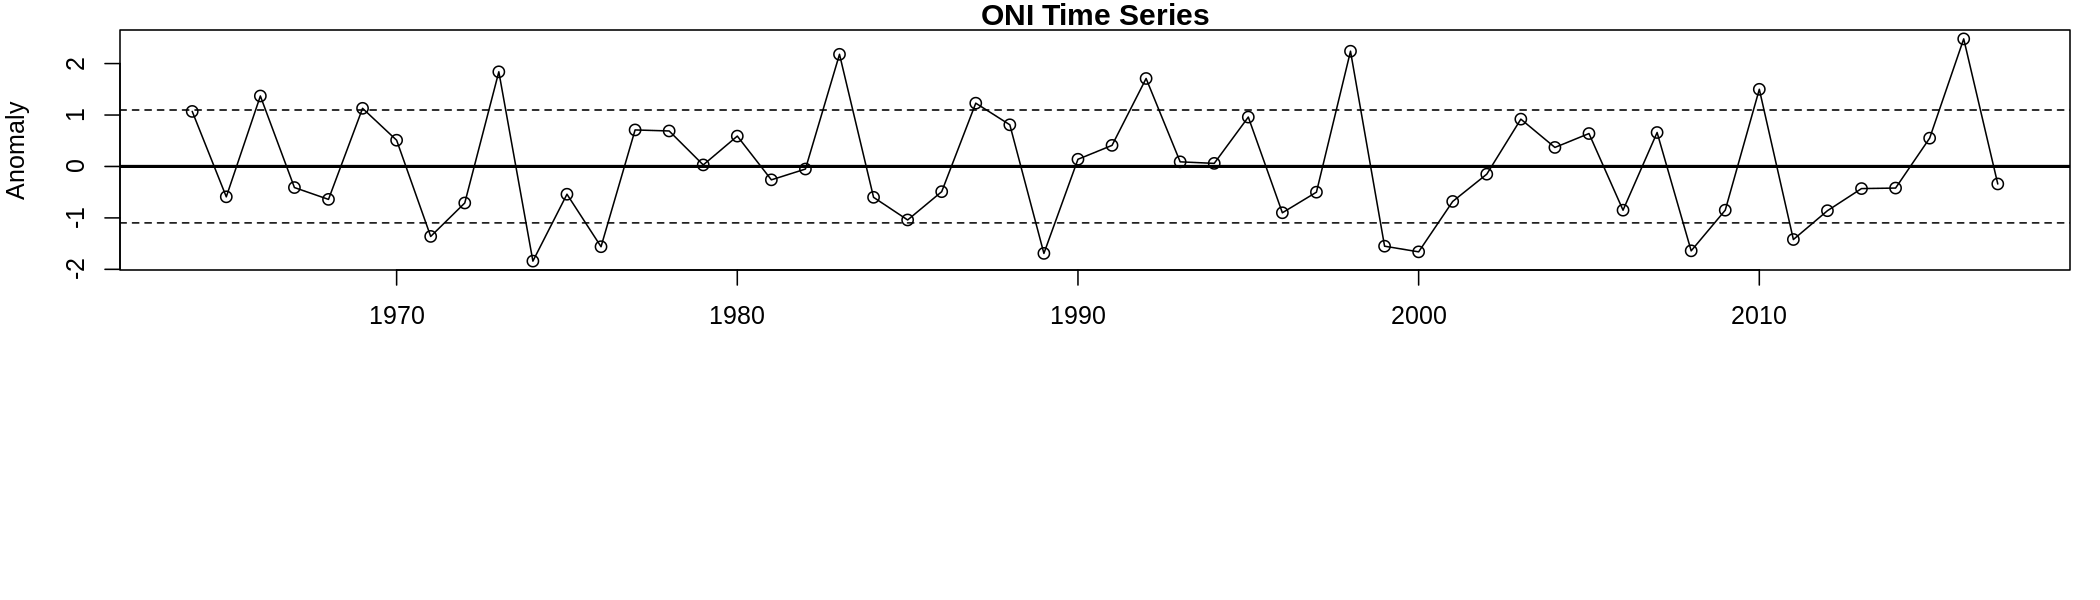

In [241]:
# Plot (see more about par)
par(mar=c(1,4,1,1))
par(fig=c(0.0,1,0.5,1))
plot(
  oni.filt$YR, oni.filt$ANOM, 
  main = "ONI Time Series", 
  type="o",
  xlab="Year",
  ylab="Anomaly")
abline(h=0, lty=1, lwd=2)
abline(h=sd(oni.filt$ANOM), lty=2)
abline(h=-1*sd(oni.filt$ANOM), lty=2)

In [203]:
# Turn anomalies into a time series object
oni.ts <- ts(oni.df$ANOM, start = c(1950, 1), frequency = 12) 

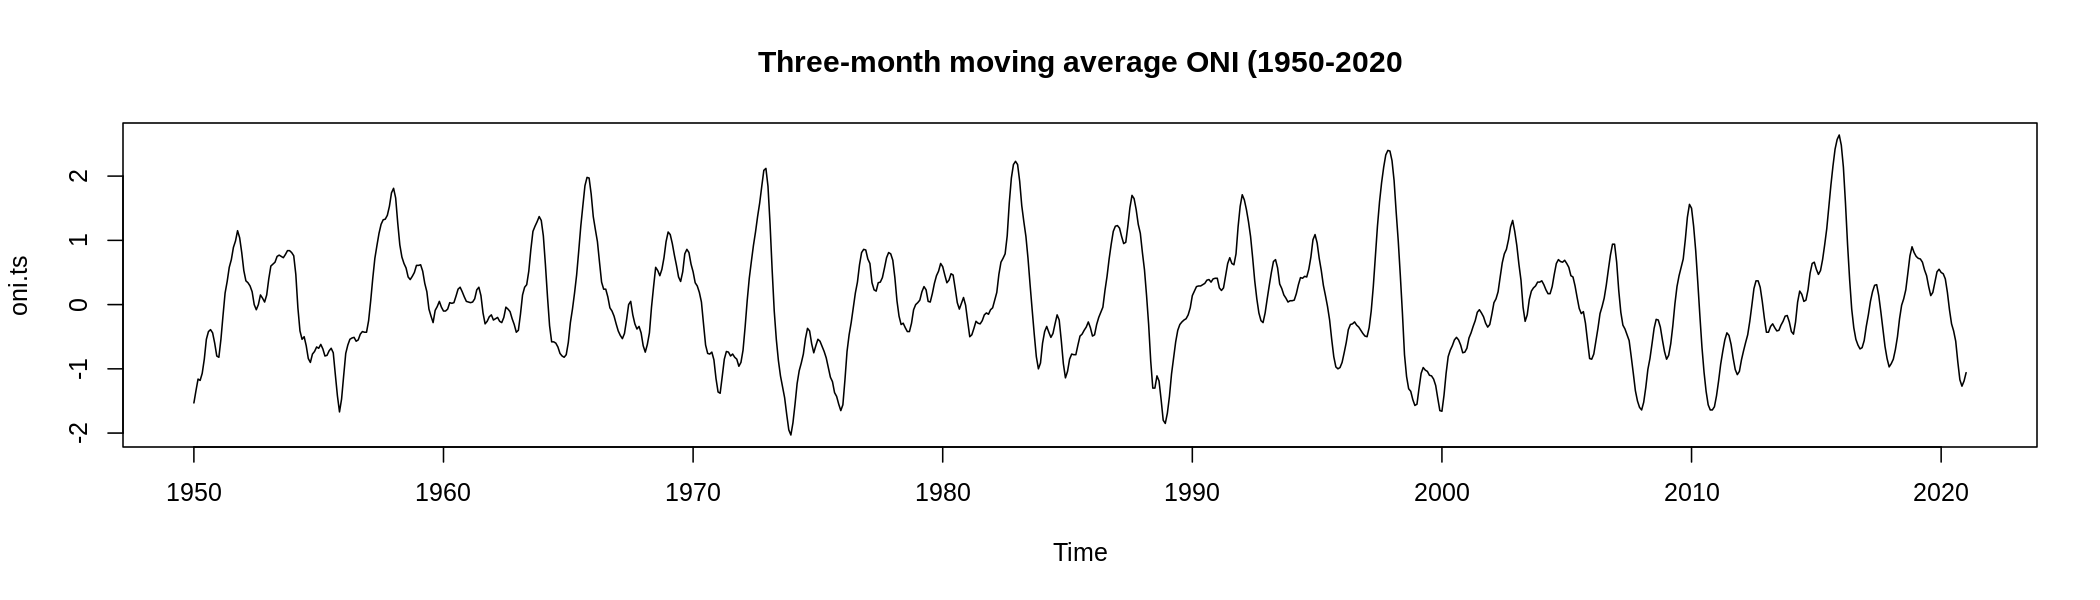

In [204]:
plot(oni.ts, main="Three-month moving average ONI (1950-2020")

#### 2.2 Multi-variate ENSO Index (MEI)


In [205]:
# Define the URL, scrub the file name, and download it to /tmp
mei.url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei.name <- tail(unlist(strsplit(mei.url, "/")), n=1)
mei.file <- paste("/tmp/", mei.name, sep="")
download.file(mei.url, mei.file, method = 'auto')

In [206]:
# Read the column names from the data
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^YEAR.*", my.line)
  if (length(a) > 0) {
    my.cols <- unlist(strsplit(my.line, "\\s+"))
  }
}

Knowing the column names, I can create an empty dataframe.
Here, I use a matrix with 0 rows and `n` columns and then give the column names to the dataframe cols.

In [207]:
# Create an empty dataframe
n.cols <- length(my.cols)
mei.df <- data.frame(matrix(ncol = n.cols, nrow = 0))
colnames(mei.df) <- my.cols 
str(mei.df)

'data.frame':	0 obs. of  13 variables:
 $ YEAR  : logi 
 $ DECJAN: logi 
 $ JANFEB: logi 
 $ FEBMAR: logi 
 $ MARAPR: logi 
 $ APRMAY: logi 
 $ MAYJUN: logi 
 $ JUNJUL: logi 
 $ JULAUG: logi 
 $ AUGSEP: logi 
 $ SEPOCT: logi 
 $ OCTNOV: logi 
 $ NOVDEC: logi 


The same method is employed once again, this time I am searching for rows that begin with a numeric (`^[0-9].*`), in other words, any row that begins with a number between 0 and 9.
I use the same string split technique as before and this time I add a double-check to be sure that the number of values I get is the same as the number of columns I found (just in case there was a row I missed that also starts with a number).

When I find my row with data and have the string split, I create an empty vector and append the `as.numeric` values, which converts the text into the number it represents; for example, the string "1950" is converted to the integer 1950.

I take my numeric data vector (`my.values`) and append it to the dataframe I created above.

In [208]:
# Get all the data lines
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^[0-9].*", my.line)
  if (length(a) > 0) {
    my.data <- unlist(strsplit(my.line, "\\s+"))
    num.data <- length(my.data)
    if (num.data == n.cols) {
      my.values <- c()
      for (d in my.data) {
        my.values <- append(my.values, as.numeric(d))
      }
      mei.df[nrow(mei.df)+1,] = my.values
    }
  }
}

Now I need to convert this into a dataframe.
The first column is the year information and each subsequent column is the two-month average for each month of the year.

In [209]:
# Slice the dataframe for all rows and not the first column
mei.df[1:10, 2:n.cols]

,DECJAN,JANFEB,FEBMAR,MARAPR,APRMAY,MAYJUN,JUNJUL,JULAUG,AUGSEP,SEPOCT,OCTNOV,NOVDEC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.030,-1.133,-1.283,-1.071,-1.434,-1.412,-1.269,-1.042,-0.631,-0.441,-1.151,-1.235
2,-1.049,-1.152,-1.178,-0.511,-0.374,0.288,0.679,0.818,0.726,0.720,0.694,0.504
3,0.433,0.138,0.071,0.224,-0.307,-0.756,-0.305,-0.374,0.310,0.265,-0.351,-0.098
4,0.044,0.401,0.277,0.687,0.756,0.191,0.382,0.209,0.483,0.087,0.078,0.351
5,-0.036,-0.027,0.154,-0.616,-1.465,-1.558,-1.355,-1.456,-1.159,-1.335,-1.124,-1.088
6,-0.740,-0.669,-1.117,-1.621,-1.653,-2.247,-1.976,-2.050,-1.829,-1.738,-1.821,-1.846
7,-1.408,-1.275,-1.371,-1.216,-1.304,-1.523,-1.244,-1.118,-1.350,-1.478,-1.024,-0.993
8,-0.915,-0.348,0.108,0.383,0.813,0.730,0.926,1.132,1.117,1.068,1.138,1.268
9,1.473,1.454,1.313,0.991,0.673,0.812,0.700,0.421,0.171,0.203,0.476,0.691


Here things get a little tricky.
I want to create a similar dataframe for MEI that was created for ONI above; therefore, I want each row in this dataframe to have the (two) monthly (averages) for the given year, but in it's current form, it does not translate well to be fed into the `ts` function.

First, I need to remove the years from the dataframe, which is done using the indexing and slicing shown above.

Next, use the `as.vector` function to convert the dataframe into a single vector; however, I want the row information one-at-a-time, so first, I have to transpose the dataframe (i.e., swap rows and columns) using the transpose, `t`, function.

In [210]:
# Check that it works on the first ten rows
as.vector(t(mei.df[1:10, 2:n.cols]))

[1] -1.030 -1.133 -1.283 -1.071 -1.434 -1.412 -1.269 -1.042 -0.631 -0.441
 [11] -1.151 -1.235 -1.049 -1.152 -1.178 -0.511 -0.374  0.288  0.679  0.818
 [21]  0.726  0.720  0.694  0.504  0.433  0.138  0.071  0.224 -0.307 -0.756
 [31] -0.305 -0.374  0.310  0.265 -0.351 -0.098  0.044  0.401  0.277  0.687
 [41]  0.756  0.191  0.382  0.209  0.483  0.087  0.078  0.351 -0.036 -0.027
 [51]  0.154 -0.616 -1.465 -1.558 -1.355 -1.456 -1.159 -1.335 -1.124 -1.088
 [61] -0.740 -0.669 -1.117 -1.621 -1.653 -2.247 -1.976 -2.050 -1.829 -1.738
 [71] -1.821 -1.846 -1.408 -1.275 -1.371 -1.216 -1.304 -1.523 -1.244 -1.118
 [81] -1.350 -1.478 -1.024 -0.993 -0.915 -0.348  0.108  0.383  0.813  0.730
 [91]  0.926  1.132  1.117  1.068  1.138  1.268  1.473  1.454  1.313  0.991
[101]  0.673  0.812  0.700  0.421  0.171  0.203  0.476  0.691  0.553  0.810
[111]  0.502  0.202 -0.025 -0.062 -0.112  0.111  0.092 -0.071 -0.170 -0.247

Now, just pass that vector into our `ts` function and give it the right parameters for our complete time series.

In [211]:
# Convert the last twelve columns into a row-by-row vector
# then feed that into the time series function
mei.ts <- ts(as.vector(t(mei.df[,2:length(my.cols)])), start = c(1950, 1), frequency = 12)

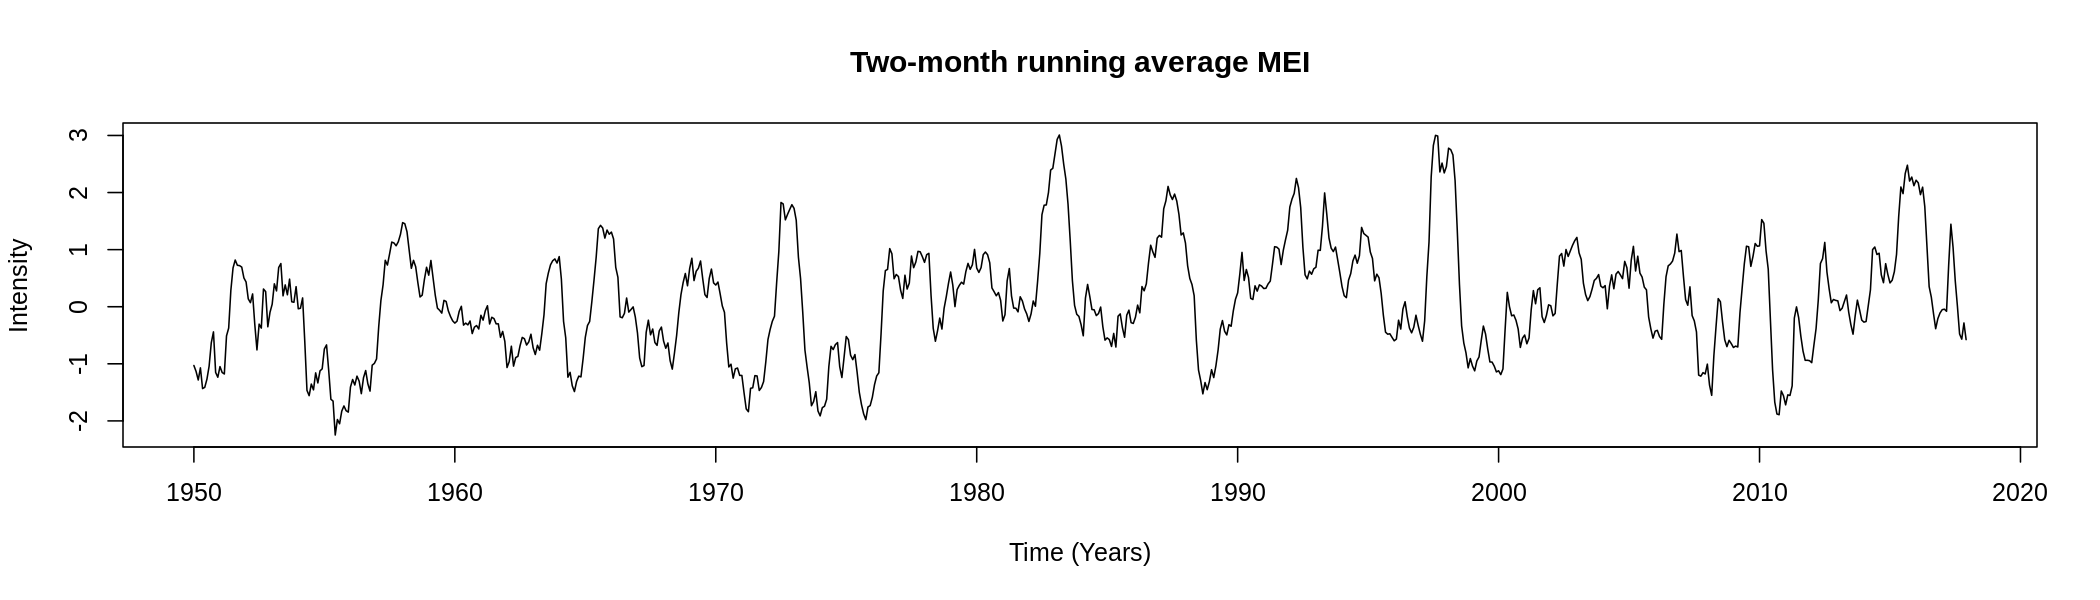

In [212]:
plot(mei.ts, main = "Two-month running average MEI", xlab = 'Time (Years)', ylab = 'Intensity')

You did it!

#### 2.3 Persons Affected by Disasters (PAD)
The data were downloaded from [EM DAT](https://public.emdat.be/) for all regions limited to dates between 1964 and 2017 for all disaster types **except** for the following (untick): 

* Technological 
* Complex
* Extra-Terrestrial (Natural)
* Geophysical (Natural)

The output contained 12,239 records and was dowloaded in a Microsoft Excel spreadsheet format (.xlsx), which was then "Saved As" a comma-separated values (.csv) file.

Investigating the CSV, we see that the first six rows are just text and we should skip them and
the seventh line begins with the column headers.

In [213]:
pad.file <- "./emdat_public.csv"
pad.df.all <- read.csv(pad.file, header=TRUE, skip=6)

In [215]:
# Retrieve fields mentioned in paper, including:
# - number of people killed (Total.Deaths)
# - declaration of state of emergency (Declaration)
# - international assistance (OFDA.Response)
# - total affected
cols.interest <- c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Deaths", "Declaration", 
                   "OFDA.Response", "Total.Affected")
pad.df <- pad.df.all[cols.interest]

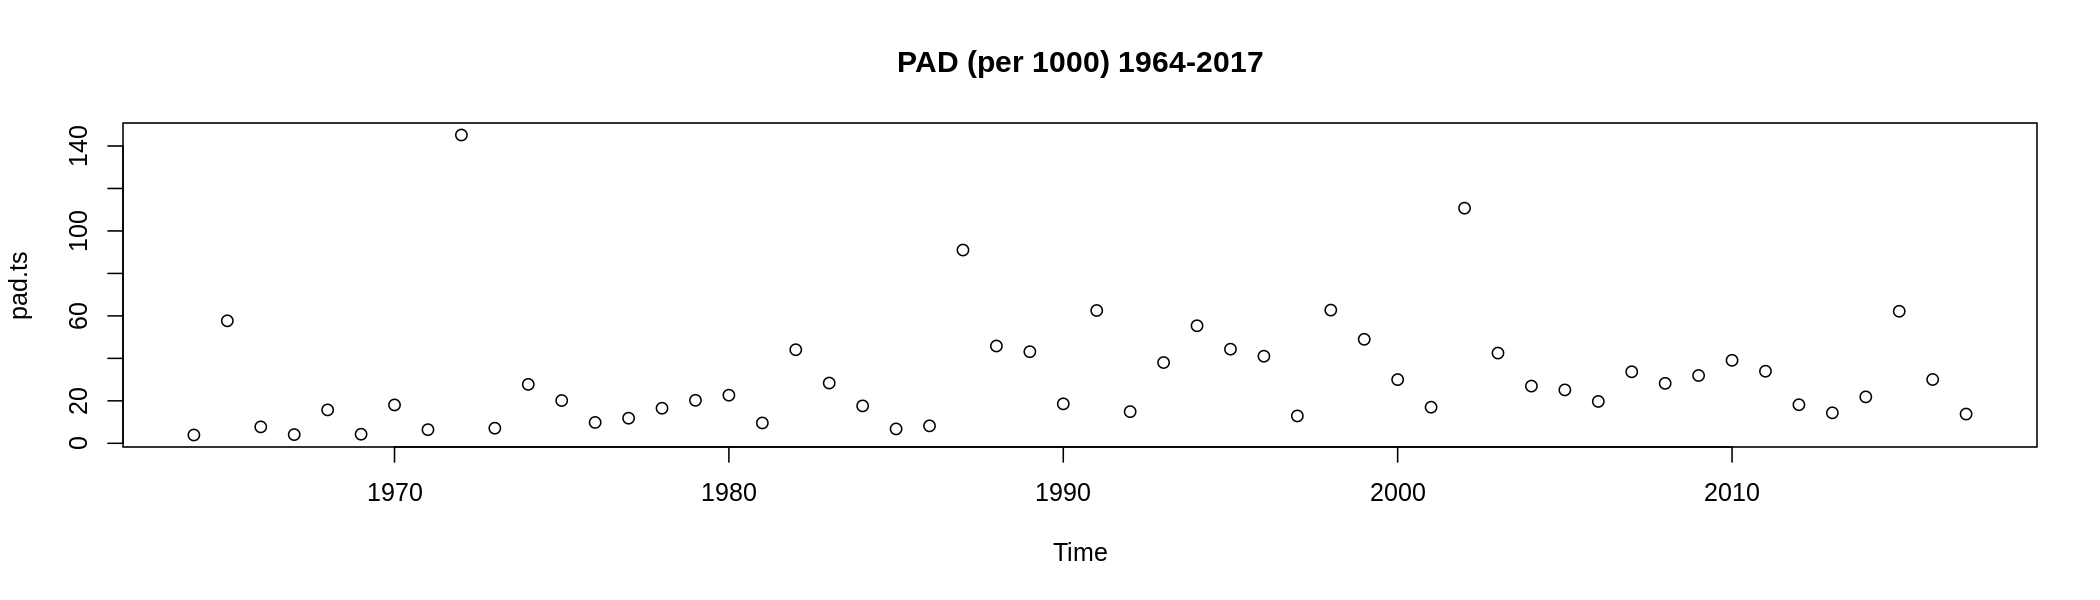

In [218]:
pad.ts <- ts(pad.vals, start = 1964, frequency = 1)

options(repr.plot.width = 14, repr.plot.height = 4, repr.plot.res = 150)

plot(pad.ts, main = 'PAD (per 1000) 1964-2017', type = 'n')
points(pad.ts, main = 'PAD (per 1000) 1964-2017')

#### 2.4 FEMA Average Global Ocean Temperature

In [219]:
fema.file <- "./FEMA Ocean Temp.csv"
fema.df.all <- read.csv(fema.file, header=TRUE, skip=6)

In [220]:
colnames(fema.df.all)

[1] "X1965"  "X.0.05"

In [221]:
fema.df <- read.delim(fema.file, header = TRUE, sep ='\t')

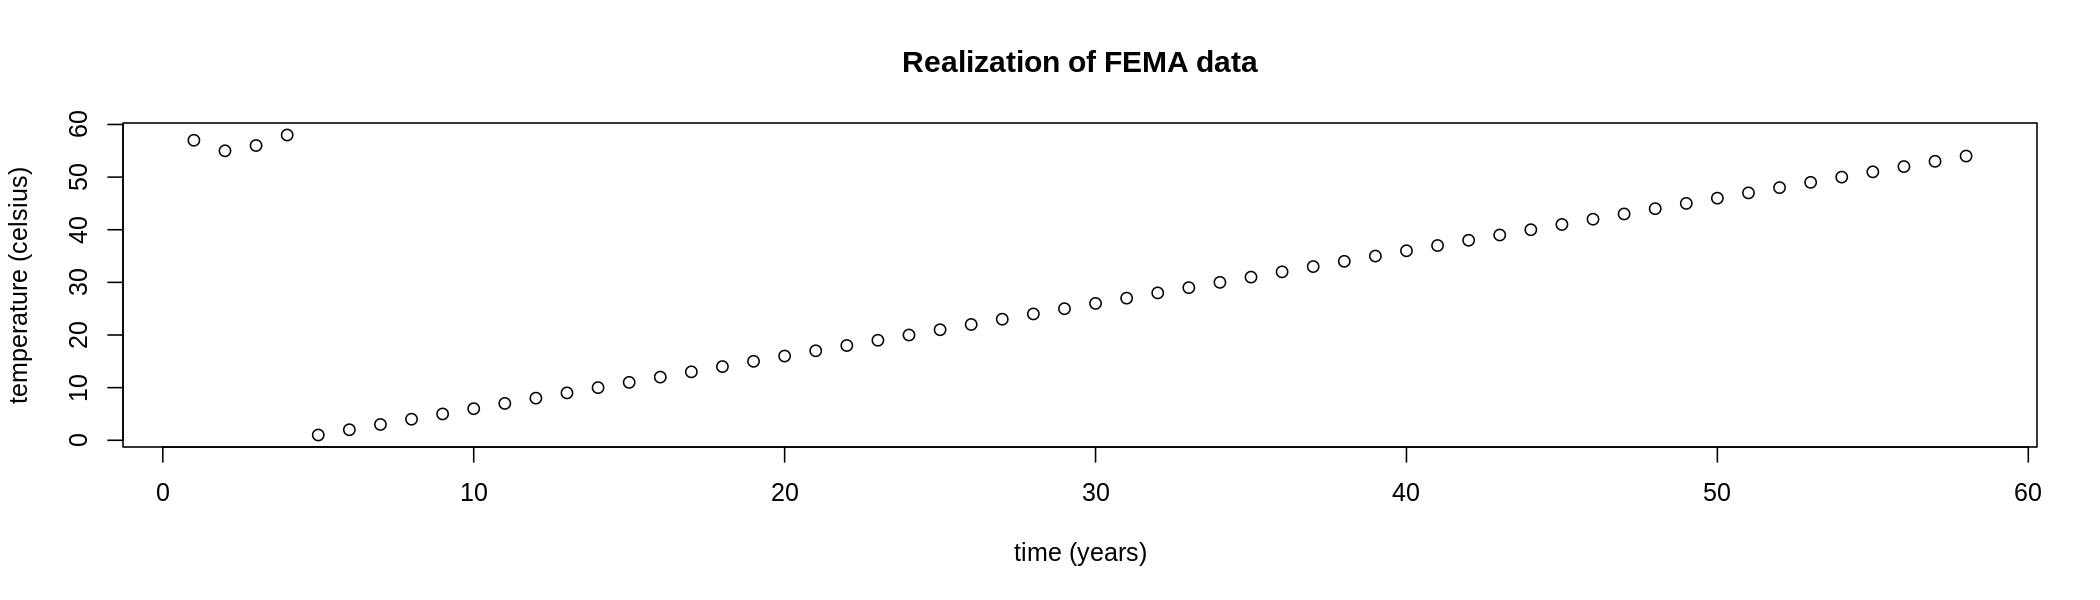

In [222]:
fema.ts <- ts(fema.df)
plot(fema.ts, type = 'n', main = 'Realization of FEMA data', ylab = 'temperature (celsius)', xlab = 'time (years)')
points(fema.ts)

#### 2.5 Population totals for countries
The next challenge is how to get the populations for our countries (per 1000).
We can find the total populations for countries through [The World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL).


In [223]:
# Downlown the zip of our table data
wbank.url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank.name <- "world_bank.zip"
wbank.file <- paste("/tmp/", wbank.name, sep="")
download.file(wbank.url, wbank.file)

These data are downloaded as a zip file.
We can extract zip files in R using [`unzip`](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/unzip).

In [224]:
unzip(zipfile = wbank.file, exdir = "/tmp")

In [225]:
# Find the CSV with country total populations from all the unzipped files.
my.file <- ""
for (tmp.file in list.files("/tmp")){
  a <- grep("^API_SP.POP.TOTL.*csv", tmp.file)
  if (length(a) > 0) {
    my.file <- tmp.file
  }
}

In [226]:
# Add the path back to the file name
wb.file <- paste("/tmp/", my.file, sep="")

In [227]:
wb.df <- read.csv(wb.file, header = TRUE, skip = 4)

#### 2.6 PAD per 1000
Our discussion paper plots the annual global people affected by disaster (PAD) in units per 1000; therefore, we need to aggregate annual counts of people and divide by total populations based on the country where the disaster occurred. To accomplish this, we:

1. Iterate through the PAD datafame, row by row
1. Extract the ISO code for that row's country, `tmp.iso`
1. Extract the year for this disaster, `tmp.year`
1. Create the year's column name for searching the Wold Bank dataframe, `tmp.col`
1. Match the ISO code for our disaster country to the corresponding row in our World Bank data frame, 

    `match(tmp.iso, wb.df$Country.Code)`; 
    
    match returns the index of the row from World Bank or `NA` if not found
1. If a match is found, then try to access that column in the world bank dataframe associated with the year of that disaster, 
    
    `wb.df[,tmp.col][a]`, 
    
    where `tmp.col` is the column name and `a` is the row index from the match
1. Save this population, `tmp.pop`, for the given country and year to a new column, `POP`, in our PAD data frame
1. If the country wasn't found, then save `NA` for that given disaster row, `pad.df[i, 'POP'] = NA`, where `i` is the row for the current disaster, and `POP` is the new field for country population for the given year.

In [228]:
# Loop through each row of our data frame and
# find the matching country and year
# remember that year columns in World Bank start with "X"
# and save the population to the original pad dataframe.
for (i in 1:nrow(pad.df)) {
  # Remember i is the row index in pad.df
  tmp.iso <- pad.df[i, ][['ISO']]
  tmp.year <- pad.df[i, ][['Start.Year']]
  tmp.col <- paste("X", tmp.year, sep="")
  # Match returns "NA" if no match
  a <- match(tmp.iso, wb.df$Country.Code)
  if (!is.na(a)) {
    tmp.pop <- wb.df[,tmp.col][a]
    # We can create new dataframe columns on the fly
    pad.df[i, 'POP'] = tmp.pop
    #print(c(tmp.iso, tmp.year, tmp.pop))
  } else {
    # Make sure to assign missing values, too!
    pad.df[i, 'POP'] = NA
    #print(paste("Could not match", tmp.iso))
  }
}

In [229]:
years <- sort(unique(pad.df$Start.Year))

pops <- list()
pads <- list()
for (j in 1:length(years)){
  # Calculate the total number of people impacted by disasters in year[j]
  # Filter out any NA rows/cols
  my.64.pad <- subset(pad.df, Start.Year == years[j])
  pad.64 <- 0
  for (i in 1:nrow(my.64.pad)){
    if (!is.na(my.64.pad$Total.Affected[i]) & !is.na(my.64.pad$POP[i])) {
      my.ta <- my.64.pad$Total.Affected[i]
      pad.64 <- pad.64 + my.ta
    }
  }
  pads[[j]] <- pad.64

  pop.64 <- 0
  for (my.iso in unique(my.64.pad$ISO)){
    a <- match(my.iso, my.64.pad$ISO)
    tmp.pop <- my.64.pad$POP[a]
    if (!is.na(tmp.pop)) {
      pop.64 <- pop.64 + tmp.pop
    }
  }
  pops[[j]] = pop.64
  
}
pads <- unlist(pads, use.names=FALSE)
pops <- unlist(pops, use.names=FALSE)

#PAD for each year (per 1000)
pad.vals <- pads/pops*1000

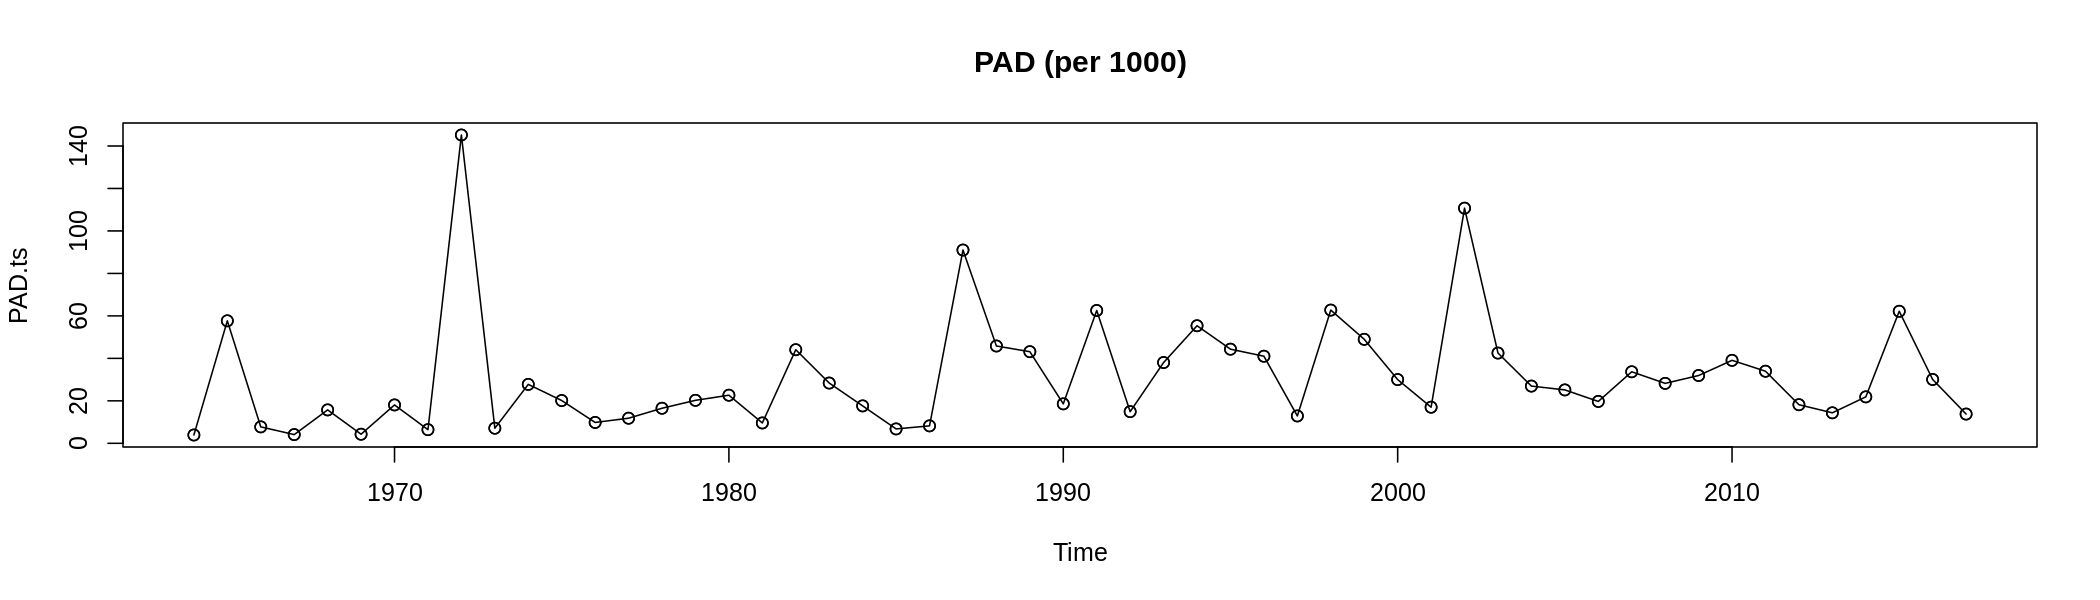

In [244]:
#Plot
PAD.ts <- ts(pad.vals, start = 1964, frequency = 1)
plot(PAD.ts, main = 'PAD (per 1000)', type = 'o')
points(PAD.ts)

#### 2.7 Identifying El Nino Years

In [231]:
#To identify El Nino Events we must track where the ONI is greater than 0.5 for 5 timesteps

oni.df$thresh <- oni.df$ANOM > 0.5
oni.df$consec <- sequence(rle(as.character(oni.df$thresh))$lengths)
years <- oni.df$YR[which(oni.df$thresh == TRUE & oni.df$consec == 5)]
years <- years[which(years > 1963 & years < 2018)] #1964-2017
relevant.times <- oni.df[which(oni.df$thresh == TRUE),]
relevant.times <- relevant.times[which(relevant.times$YR > 1963 & relevant.times$YR < 2018),]
starts = list()
ends = list()

for (i in 1:(length(relevant.times$YR)-1)){
  if (relevant.times$consec[i]==1){
    starts[[i]] <- relevant.times$YR[i]
  }
  if (relevant.times$consec[i+1] < relevant.times$consec[i]){
    ends[[i]] <- relevant.times$YR[i]
  }
}

starts <- Filter(Negate(is.null), starts)
ends <- Filter(Negate(is.null),ends)
start.years <- starts[1:length(starts)-1]
end.years <- ends[2:length(ends)]

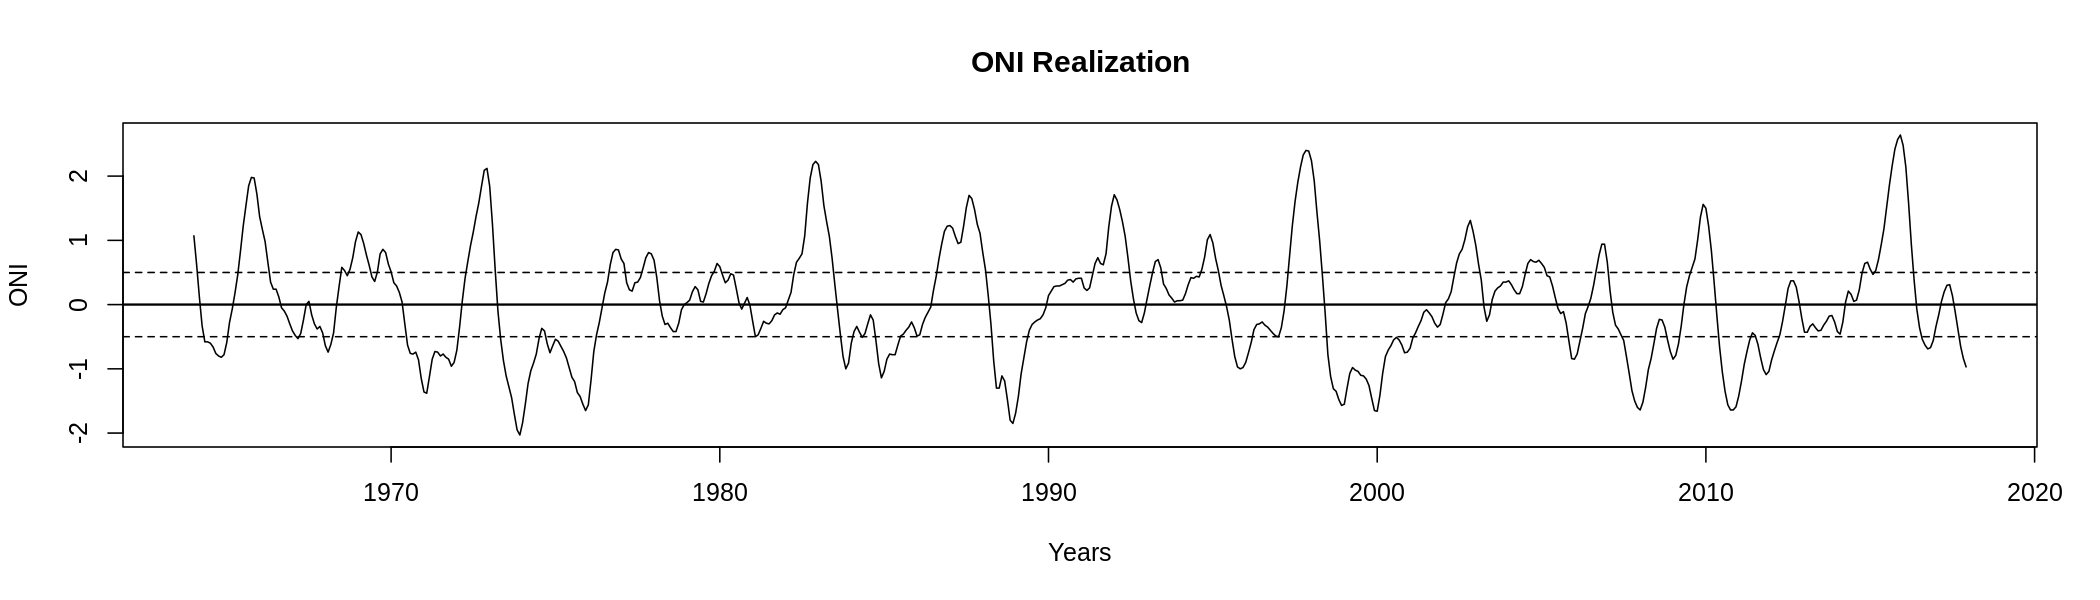

In [245]:
elnino.ts <- ts(oni.df[which(oni.df$YR > 1963 & oni.df$YR < 2018),]$ANOM, start = 1964, freq = 12)
plot(elnino.ts, type ='l', main = 'ONI Realization', ylab = 'ONI', xlab = 'Years')

abline(h=0, lwd = 1.5)
abline(h = 0.5, lty = 2)
abline(h = -0.5, lty = 2)

In [233]:
#Binarizing
elnin.years <- start.years
years <- c(1964:2017)

vals <- list()
for (i in 1:length(years)){
  checker = 0 

  for (j in 1:length(elnin.years)){
    if (years[i] == elnin.years[j]){
      checker <- 1
    }
  }

  if (checker == 1){
    vals[[i]] <- 1
  }

  if (checker == 0){
    vals[[i]] <- 0
  }
}

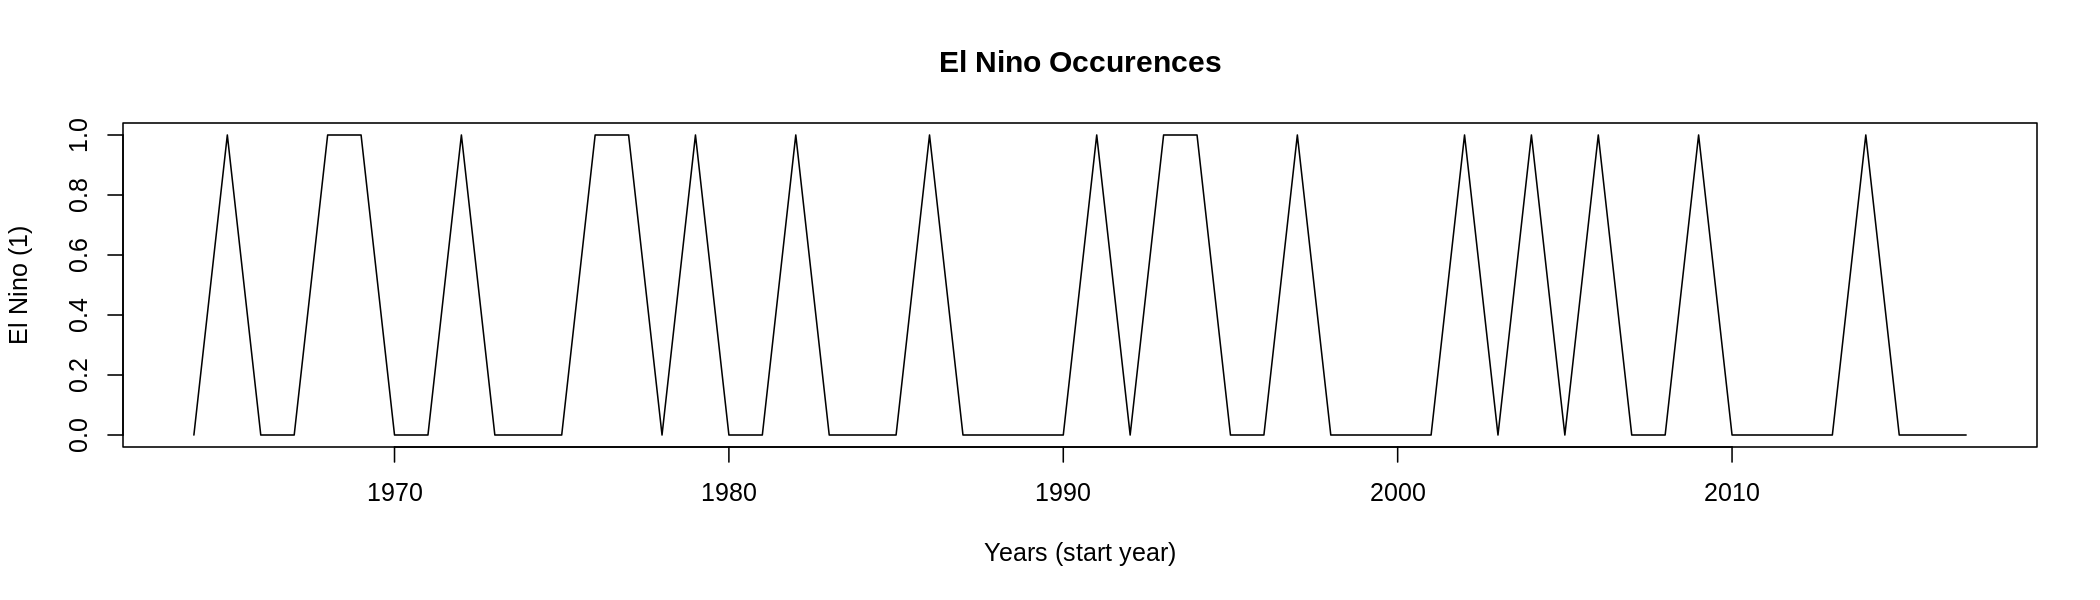

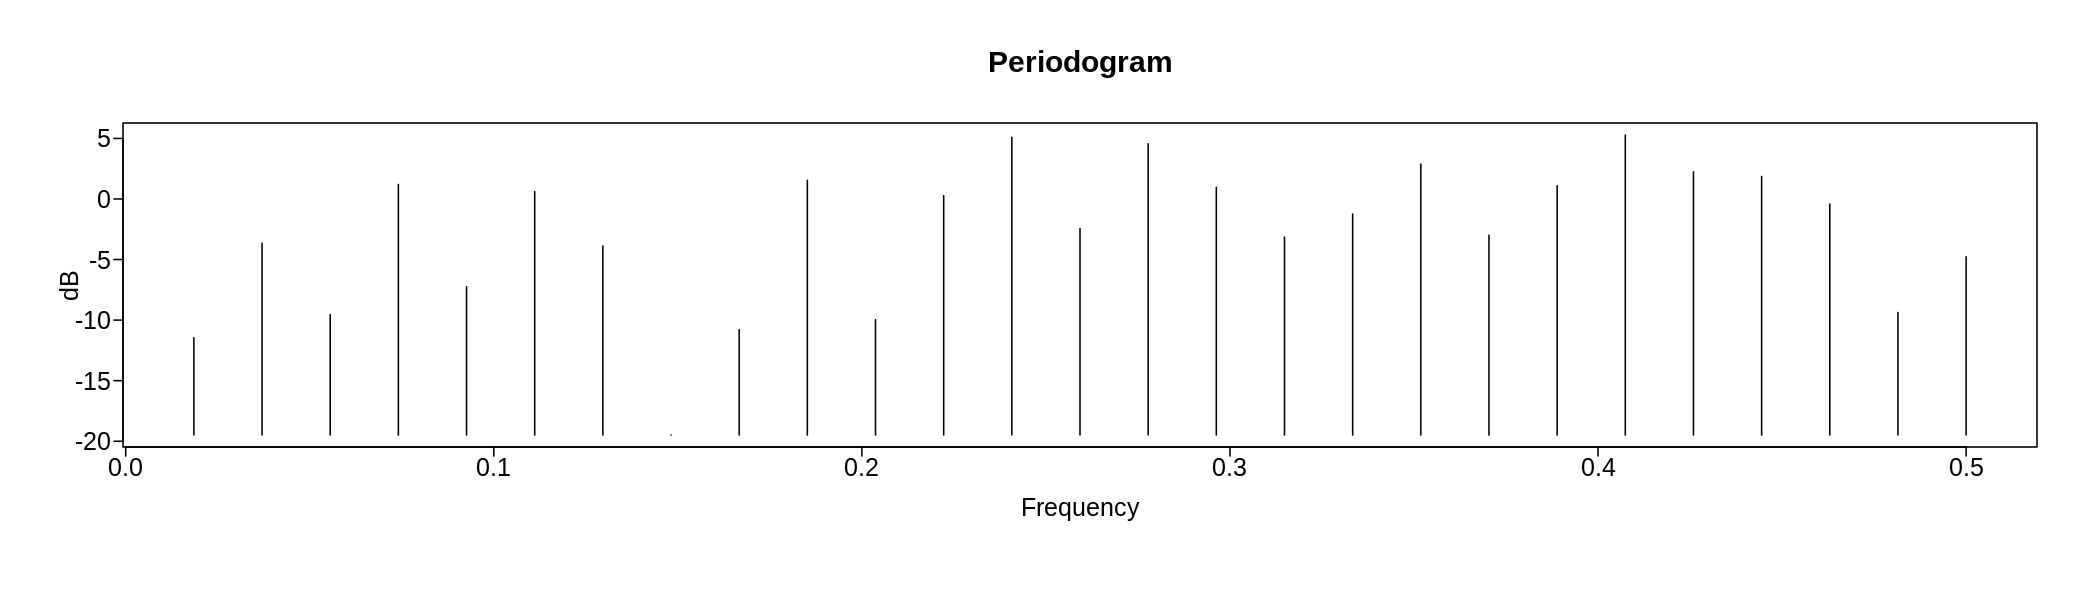

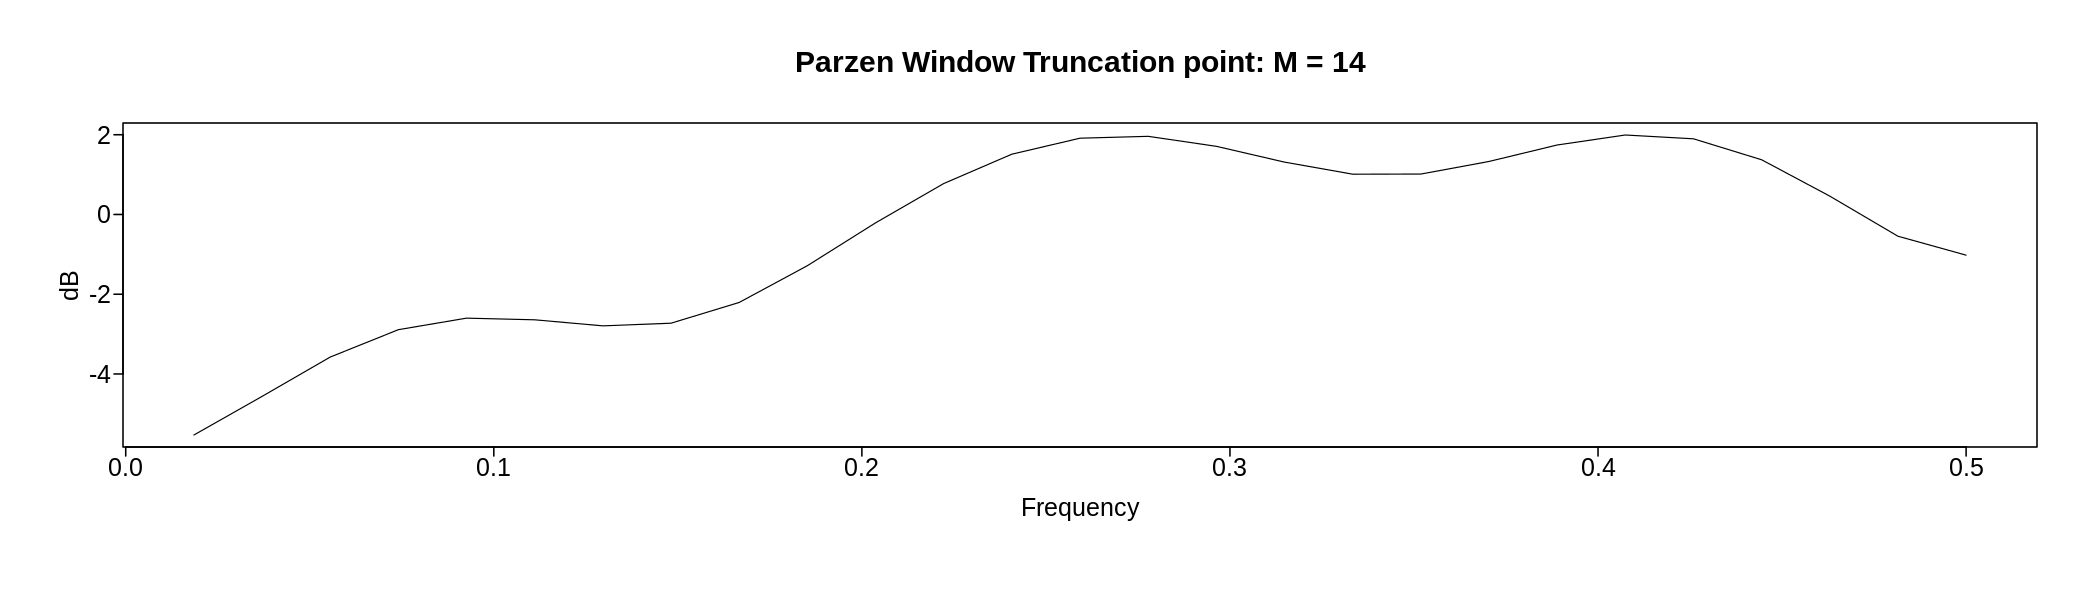

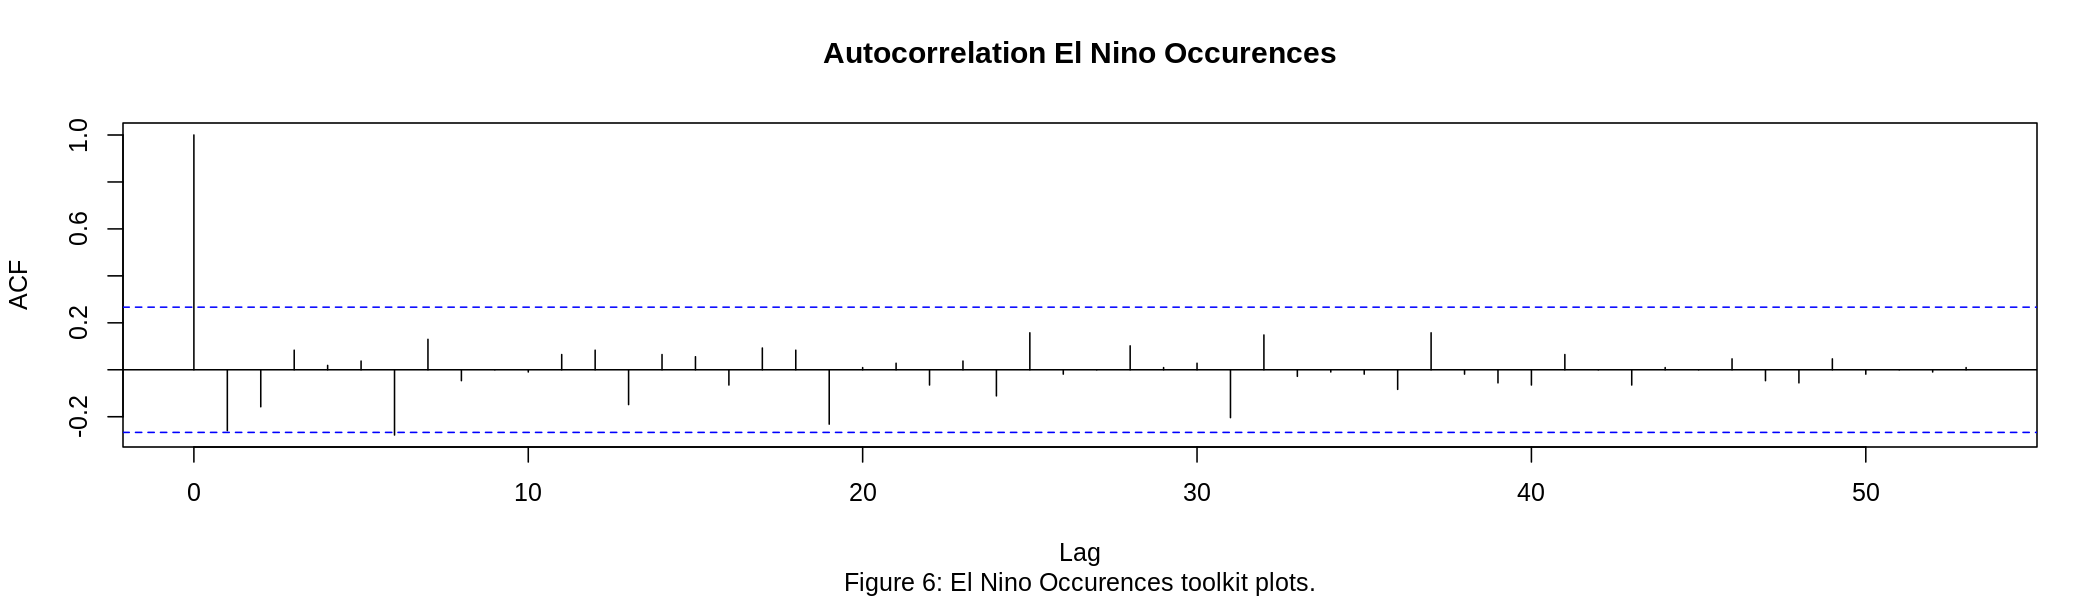

In [234]:
#Plotting
ninos.ts <- ts(vals, start = 1964, frequency = 1)
plot(ninos.ts, type = 'l', xlab ='Years (start year)', ylab='El Nino (1)', main ='El Nino Occurences')
vals <- as.numeric(vals)
nino.plot <- period.wge(vals)
par.nino <- parzen.wge(vals)
acf(vals, lag.max = 80, main = 'Autocorrelation El Nino Occurences', sub = 'Figure 6: El Nino Occurences toolkit plots.')

### 3. Results
Below I will generate plots for the ONI, MEI, PAD, and FEMA datasets.  These plots will include the realization, a periodogram, and an ACF.

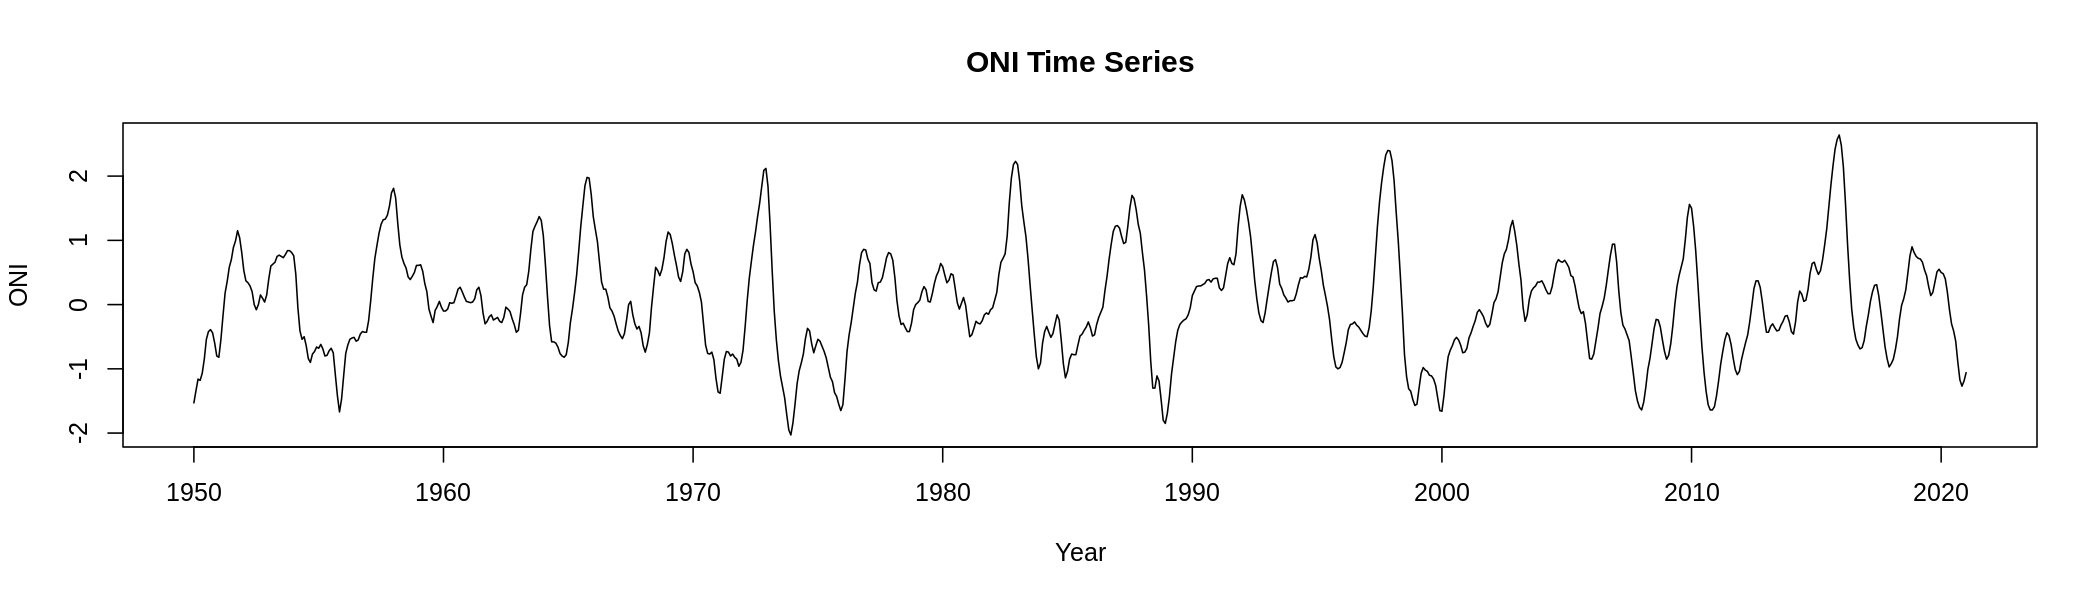

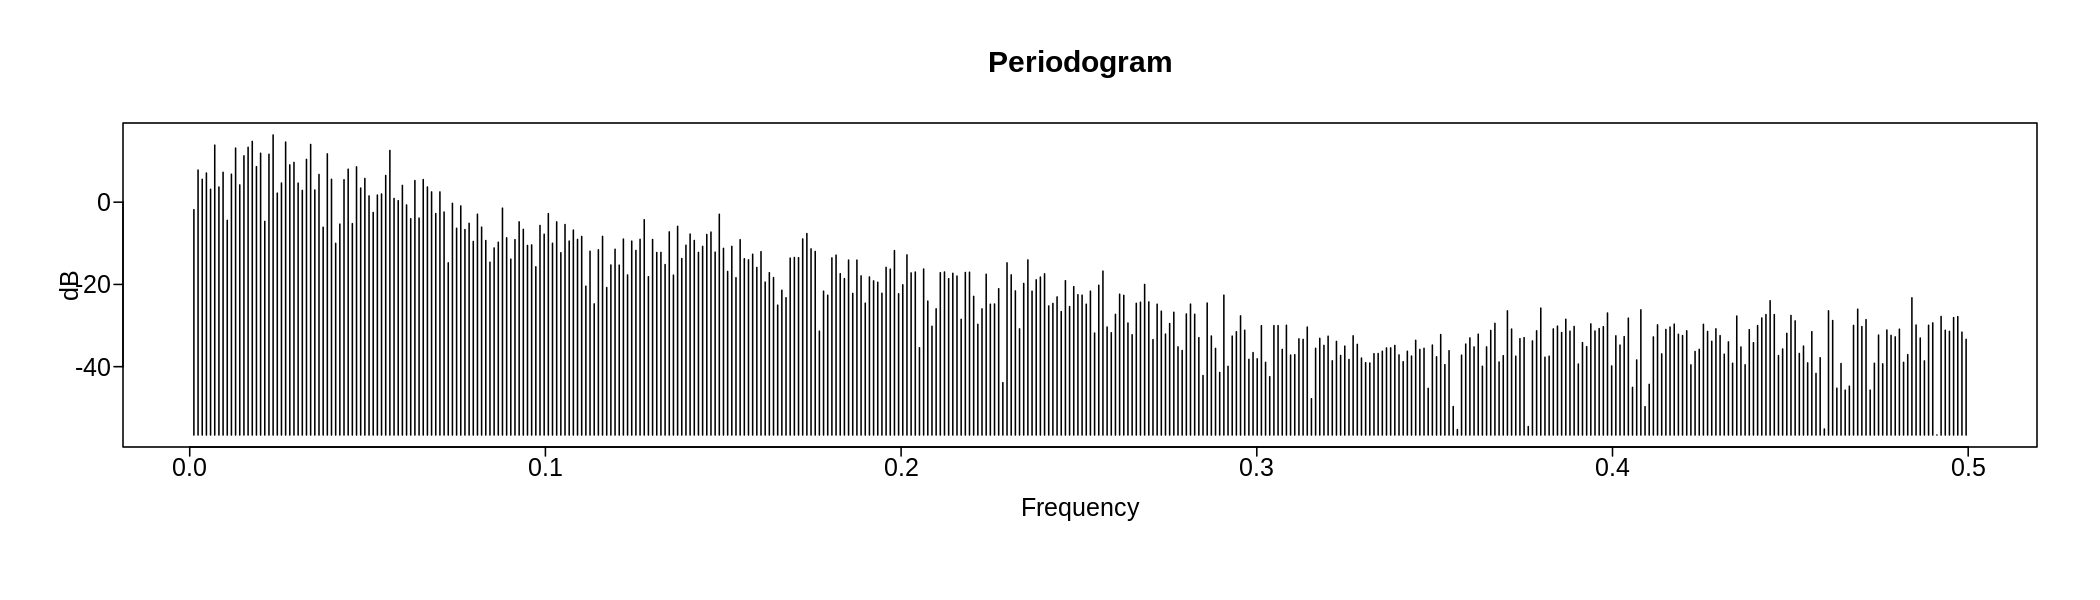

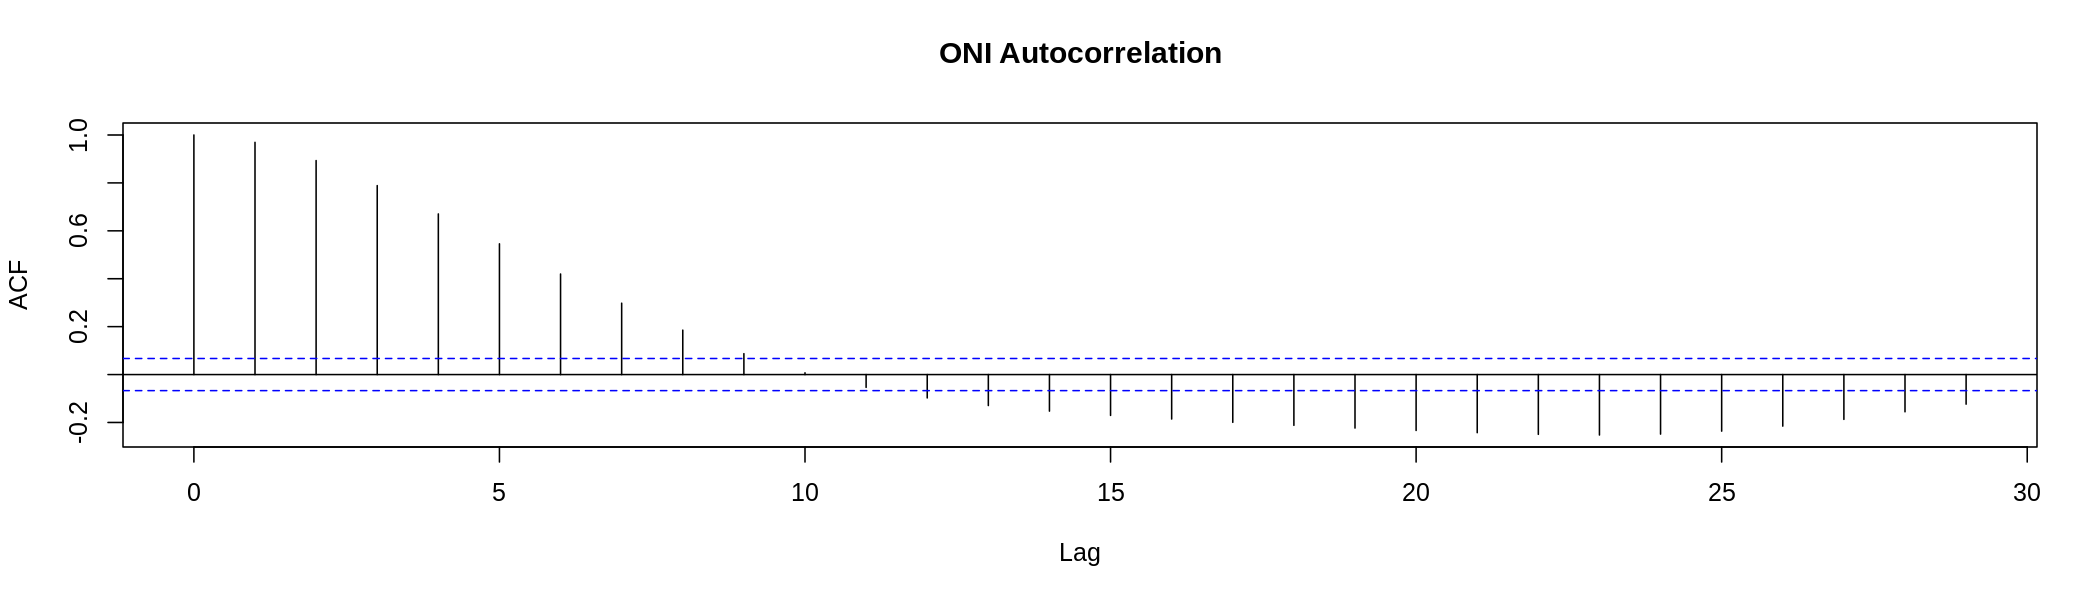

In [254]:
plot(oni.ts, xlab = "Year", ylab = "ONI", main = "ONI Time Series")
periodogram <- period.wge(oni.df$ANOM, plot=TRUE)
acf(oni.df$ANOM, type = "correlation", main="ONI Autocorrelation")

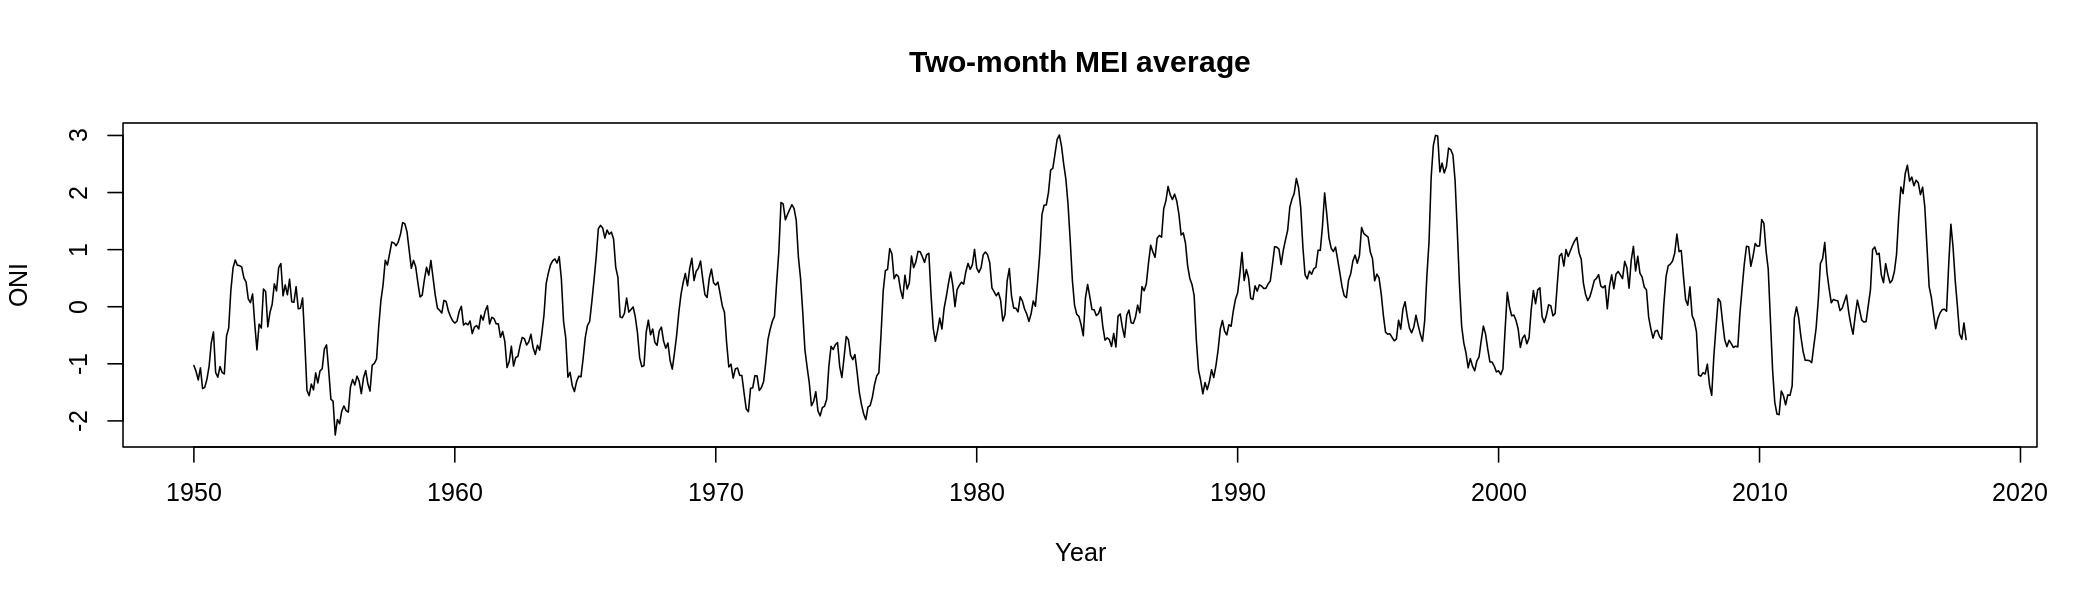

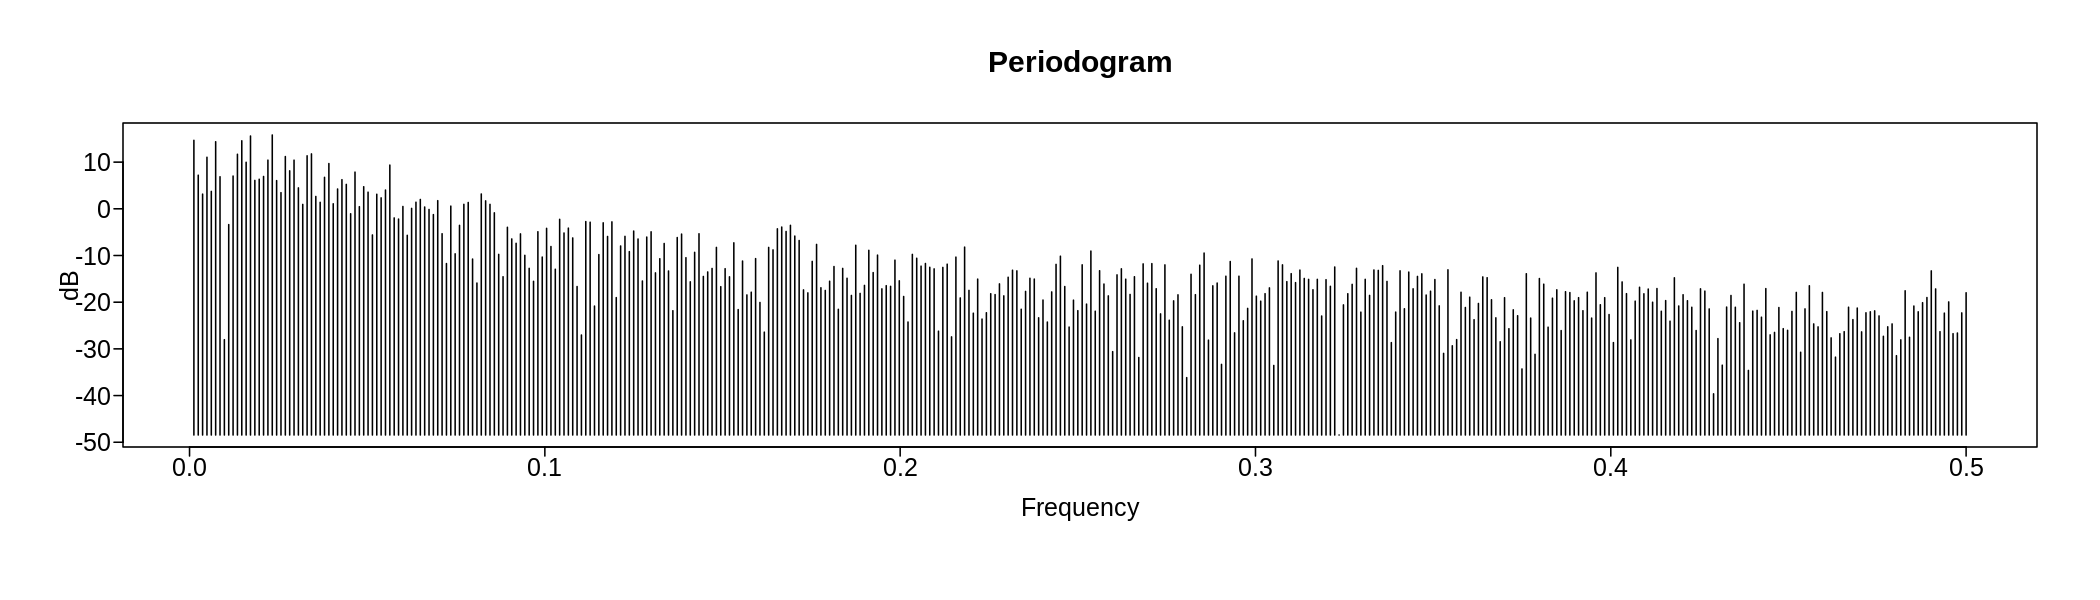

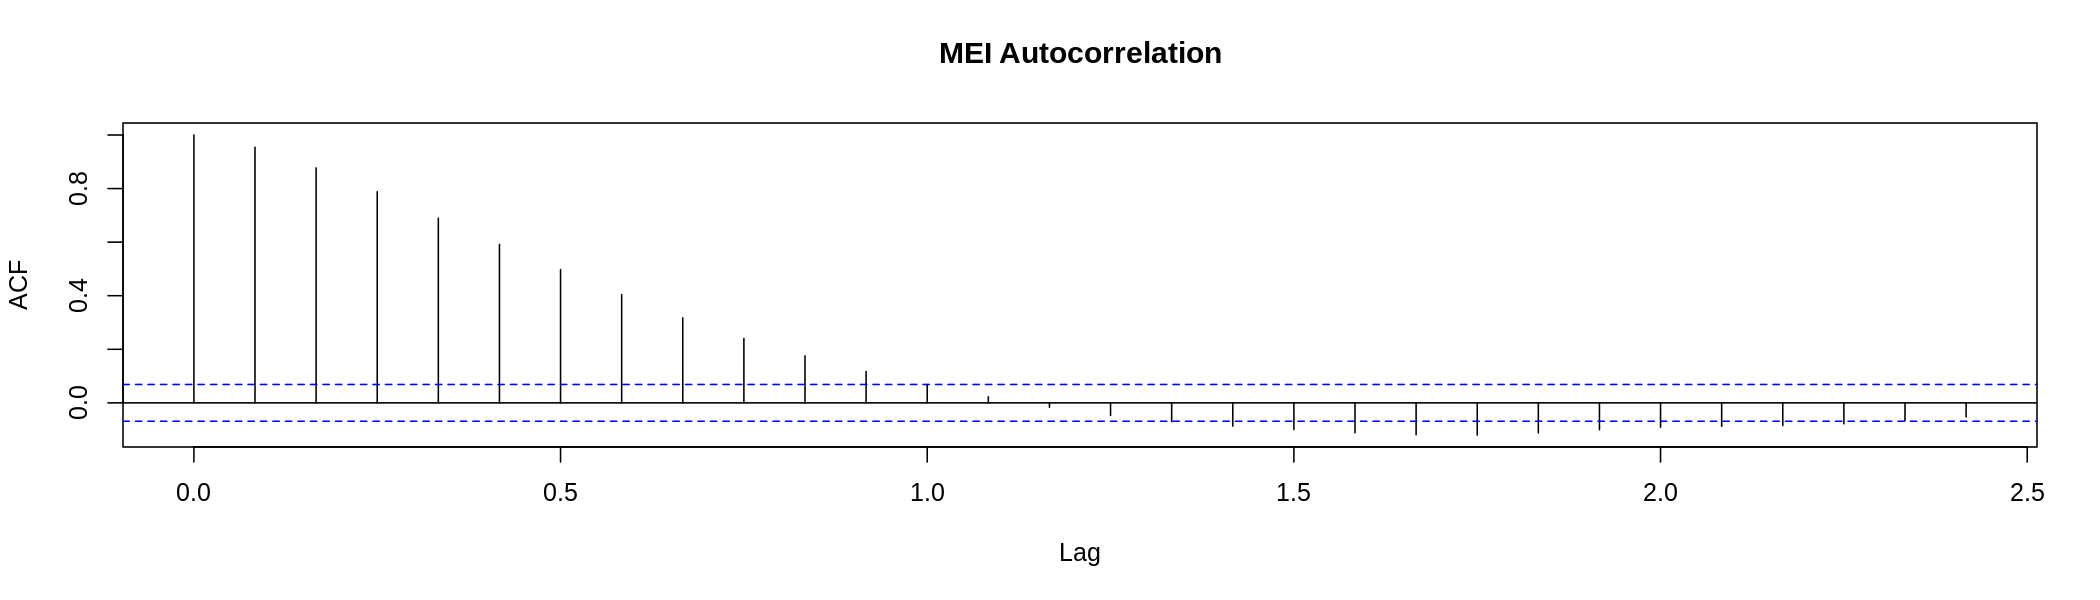

In [253]:
plot(mei.ts, xlab = "Year", ylab = "ONI", main = "Two-month MEI average")
periodogram <- period.wge(mei.ts, plot = TRUE)
acf(mei.ts, type = "correlation", main='MEI Autocorrelation')

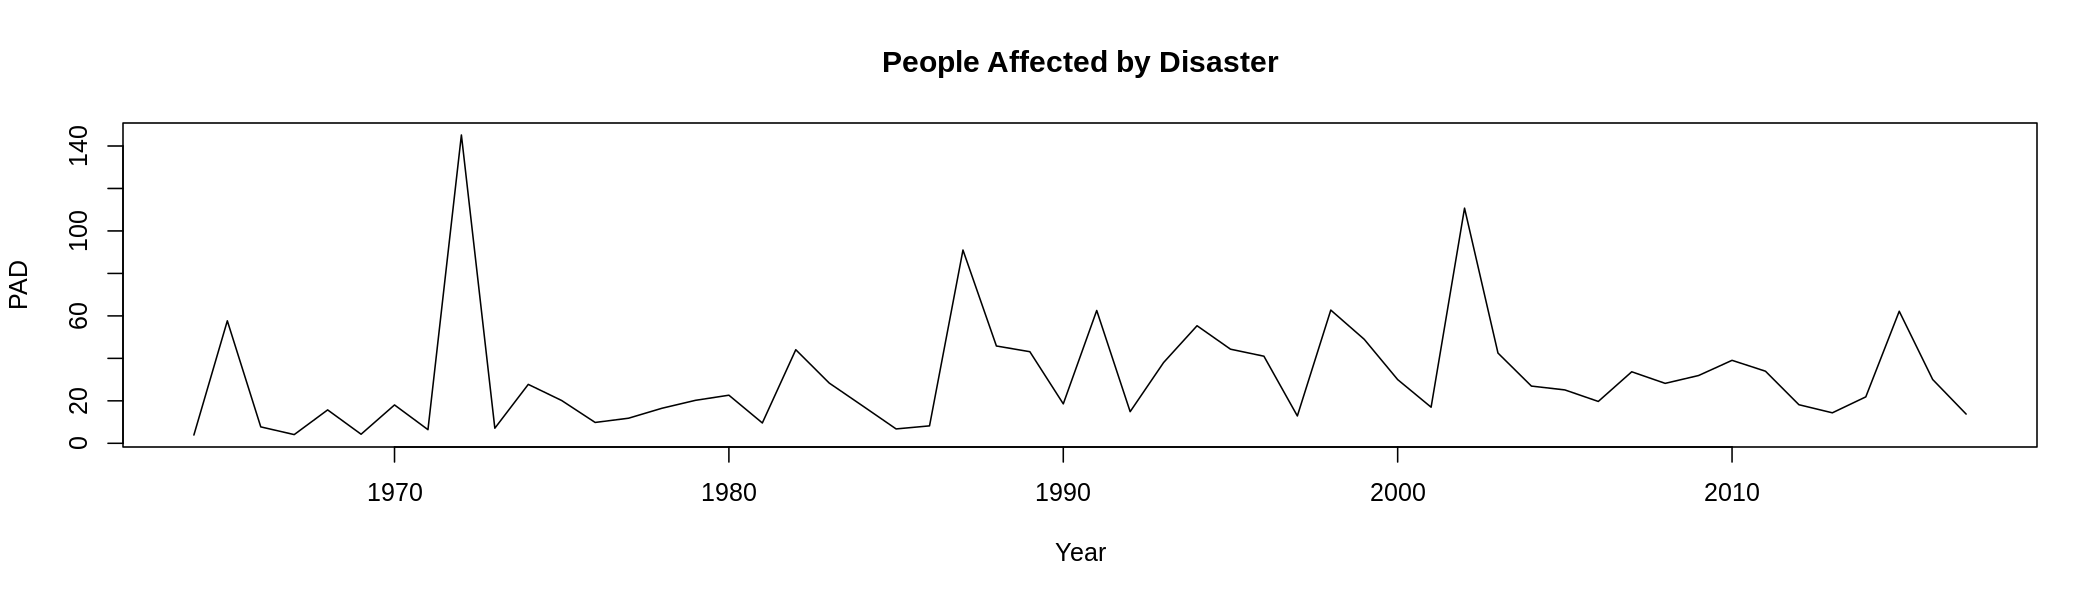

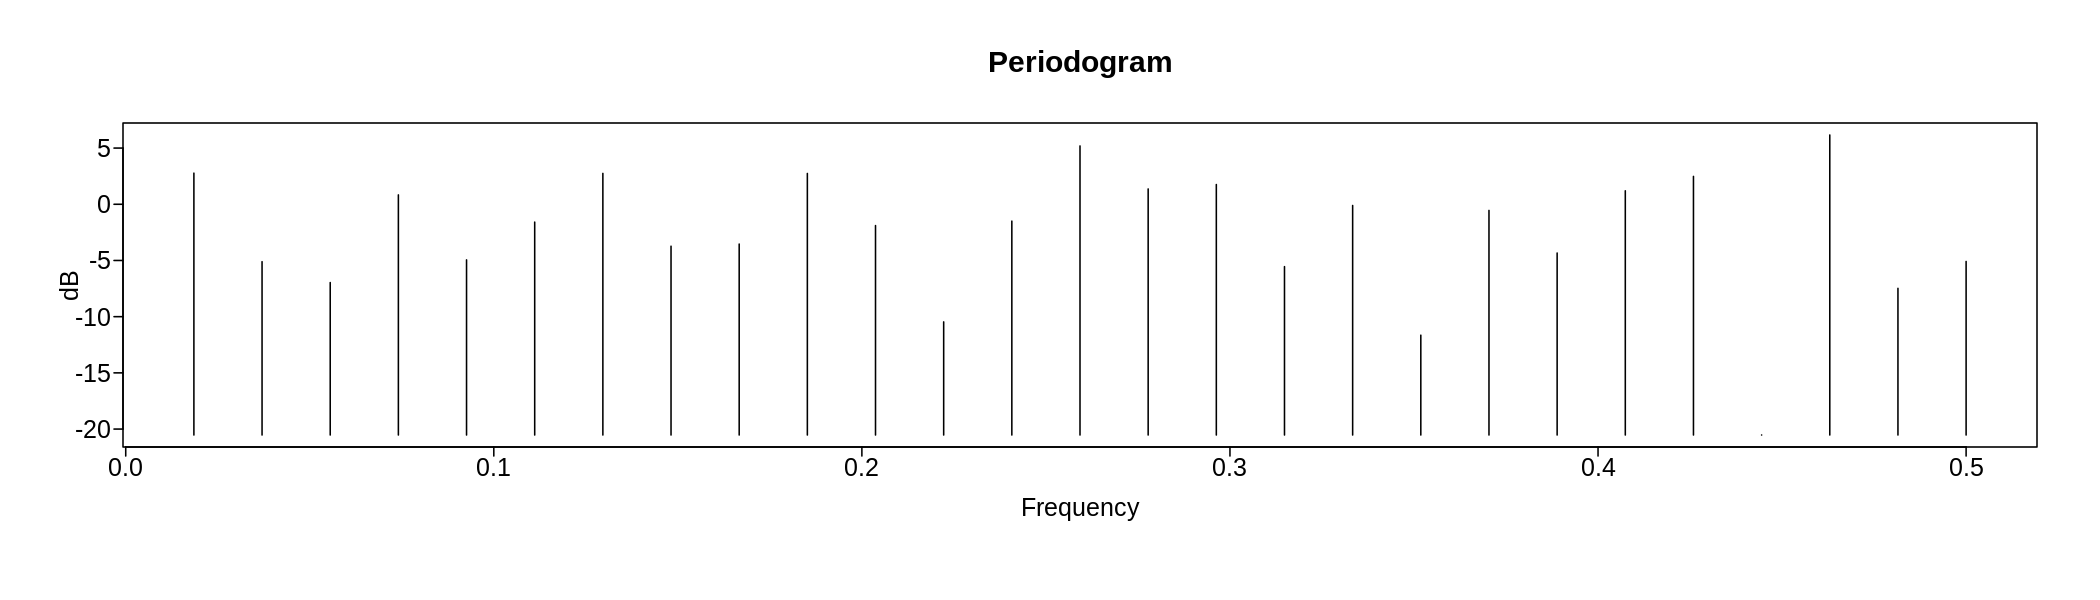

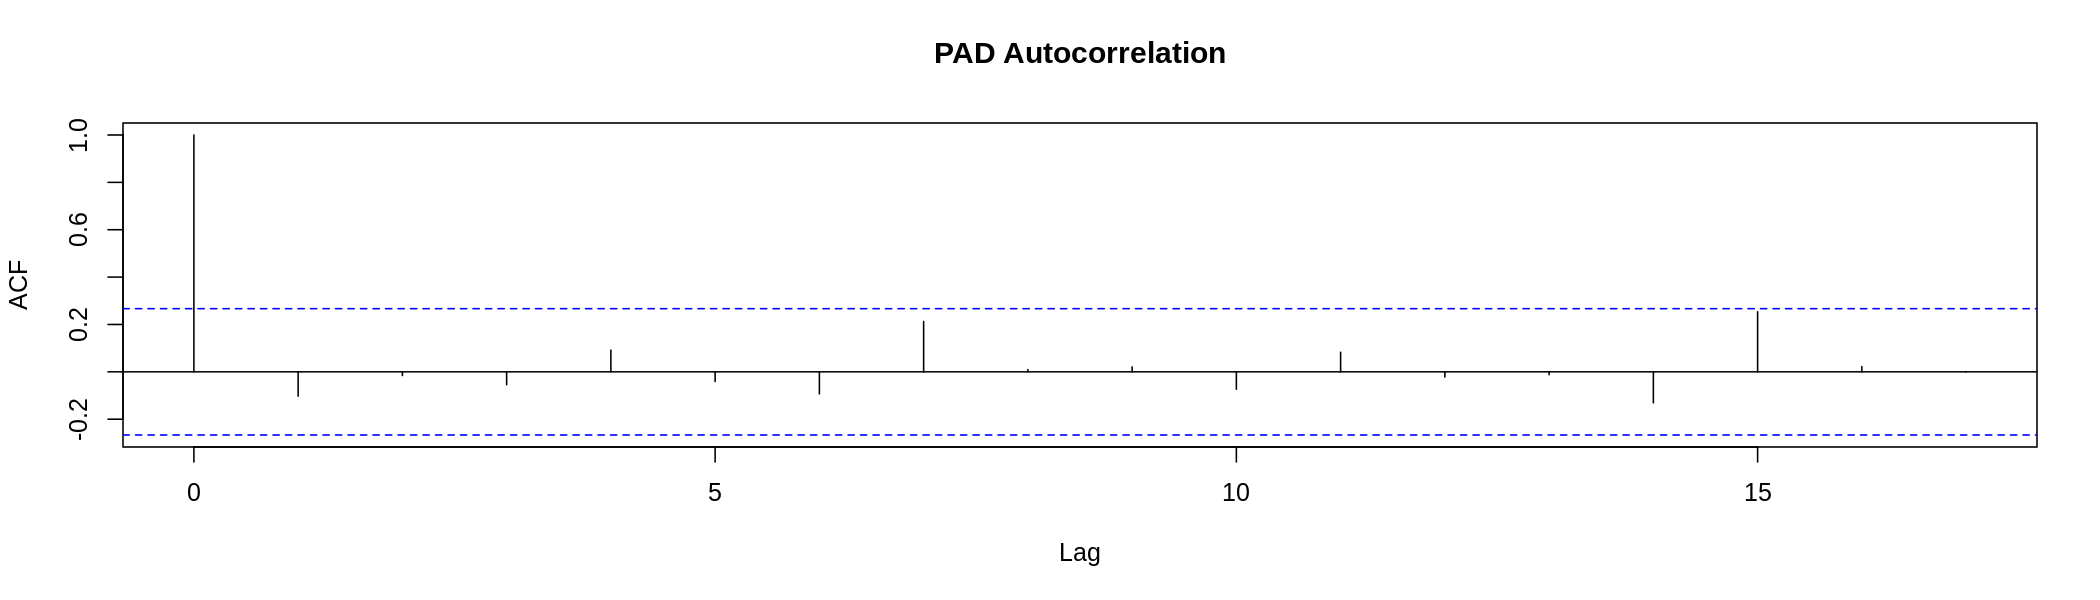

In [251]:
plot(pad.ts, xlab = "Year", ylab = "PAD", main = "People Affected by Disaster")
periodogram <- period.wge(pad.ts, plot = TRUE)
acf(pad.ts, type = "correlation", main="PAD Autocorrelation")

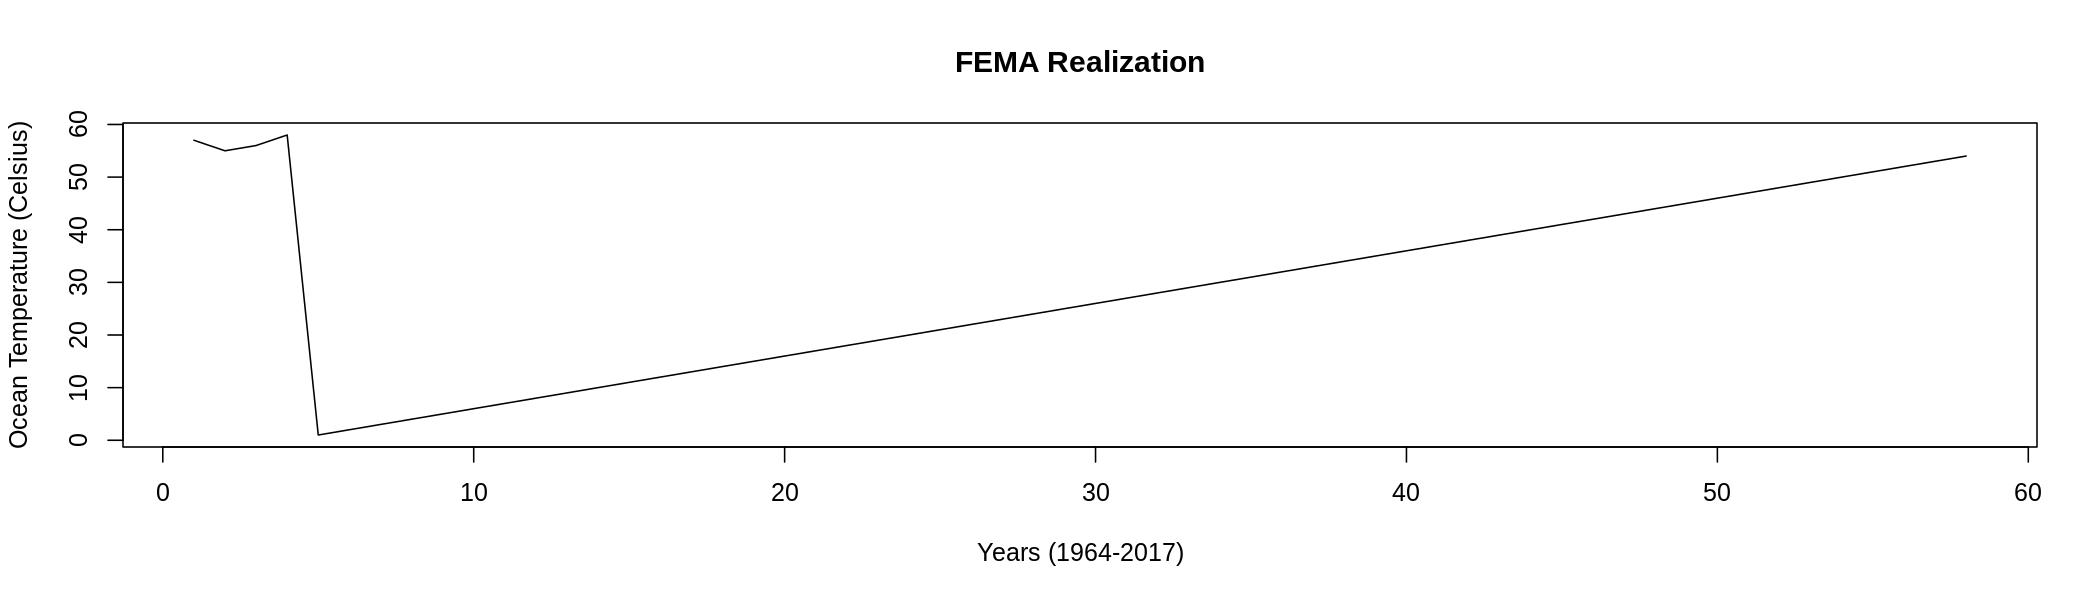

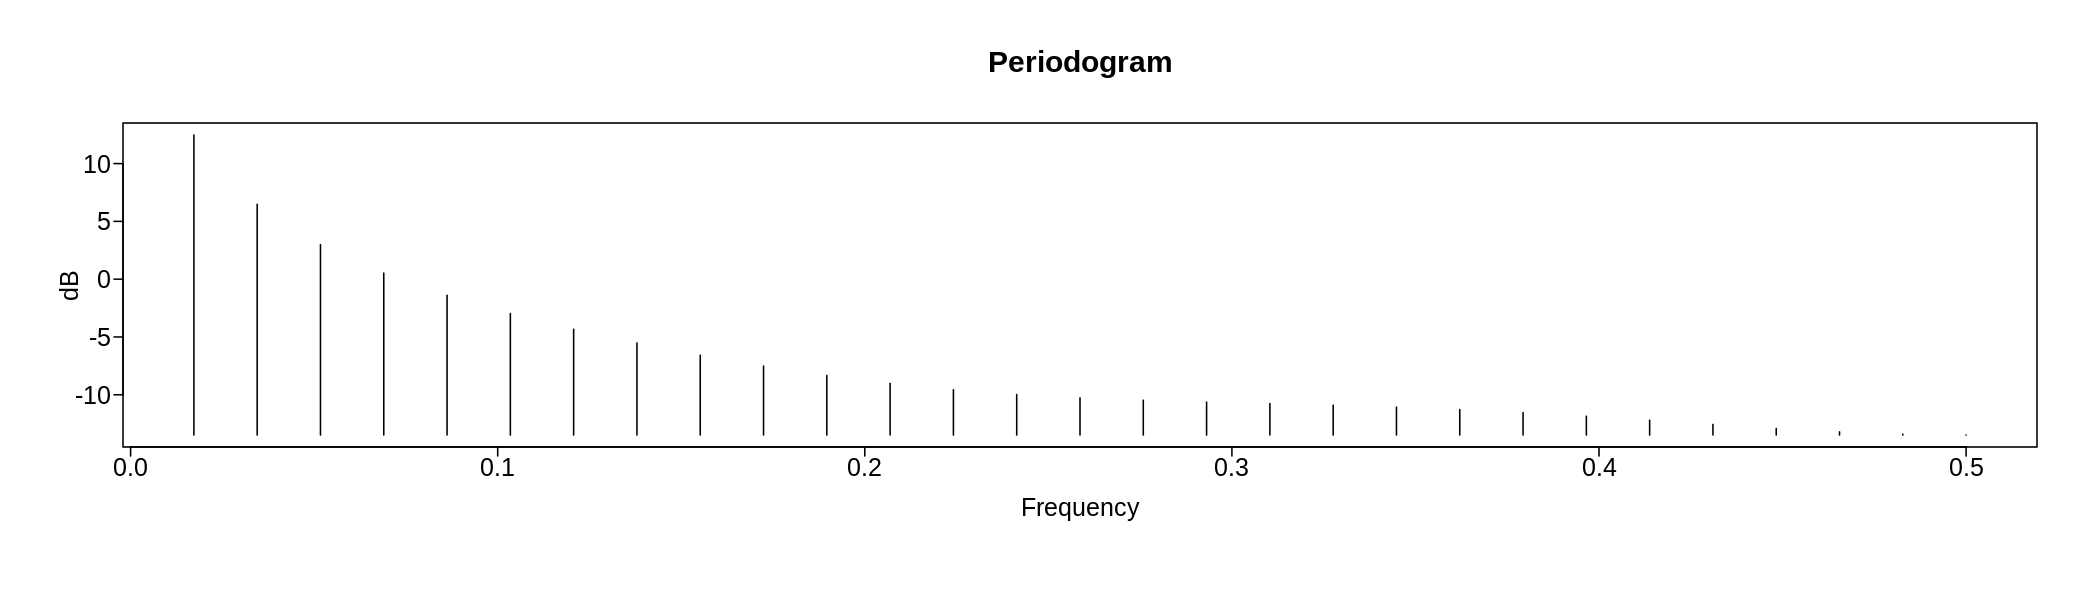

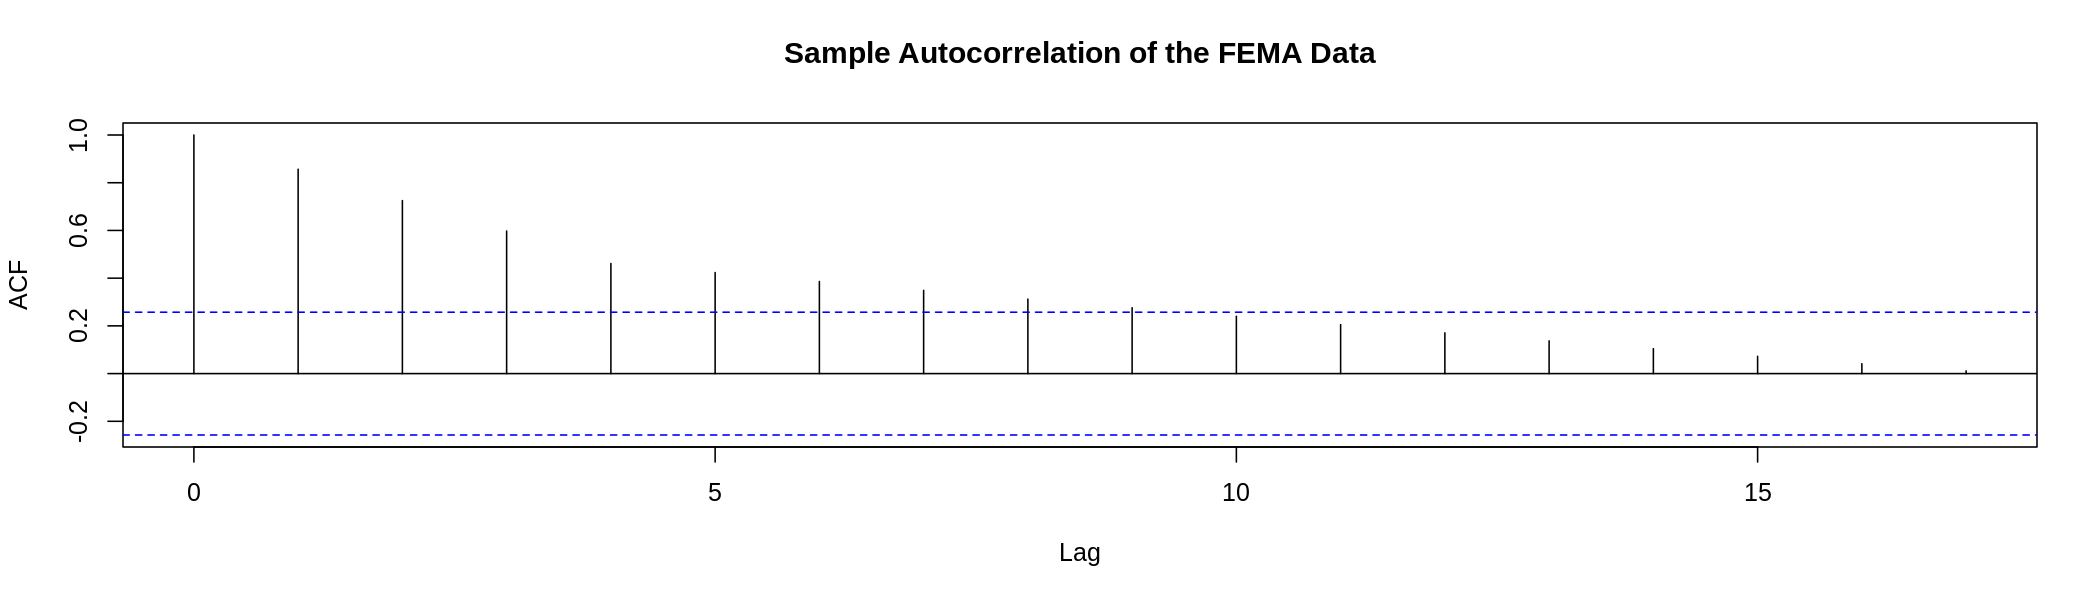

In [249]:
plot(fema.ts, main = 'FEMA Realization', xlab = 'Years (1964-2017)', ylab = 'Ocean Temperature (Celsius)')
periodogram <- period.wge(fema.ts, plot=TRUE)
acf(fema.ts, type = "correlation", main="Sample Autocorrelation of the FEMA Data")

Although Hard to notice in the FEMA realization that I generated, FEMA already had one on their site where you could actually see a peak in temperature roughly every 4-6 years.

### 4. Discussion and Conclusions
In this lab, I imported 5 separate datasets.  These are the ONI, MEI, EMDAT, World Bank, and FEMA data that were all utilized towards analyzing the El Nino Southern Oscillation (ENSO).  Specifically, the goal was to track People Affected by Disaster per 1000, and to be able to identify El Nino Years.  I thought this lab was actually quite interesting and I got to try to do some pretty cool stuff with time-series in order to assess when an ENSO event is occuring and how many people it affects by year.  I thought that this lab was pretty good, and I was able to get more acquainted with different softwares but I did struggle with the Identifying ENSO years and PAD per 1000 a little, but was able to get some help from friends in the class, notes, stack/blackboard, etc... I think my biggest problem with this lab is that I procrastinated it up until a week before it was originally due and did not realize that it would take me as much time as it has. I am a pretty new data science student (although I have an associate's in CS that I received before transferring here) and I am not well-versed in Python, R, and a lot of the DS syntax, but I am learning which is the good thing!

### 5. References


*   https://psl.noaa.gov/data/correlation/oni.data
*   https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt


*   https://psl.noaa.gov/enso/mei/data/meiv2.data
*   https://psl.noaa.gov/enso/mei.old/table.html


*   https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v1
*   https://public.emdat.be/data


*   https://data.worldbank.org/indicator/SP.POP.TOTL







